# Advent of Code 2021

In [1]:
import os
import sys
import re
import numpy as np
from itertools import chain, permutations, product
import itertools
from collections import Counter, defaultdict, namedtuple
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import heapq
from copy import deepcopy
import scipy
import random

%matplotlib inline

### Table of Contents
- [Day 01: Sonar Sweep](#day1)
- [Day 02: Dive!](#day2)
- [Day 03: Binary Diagnostic](#day3)
- [Day 04: Giant Squid](#day4)
- [Day 05: Hydrotermal Venture](#day5)
- [Day 06: Lanternfish](#day6)
- [Day 07: The Treachery of Whales](#day7)
- [Day 08: Seven Segment Search](#day8)
- [Day 09: Smoke Basin](#day9)
- [Day 10: Syntax Scoring](#day10)
- [Day 11: Dumbo Octopus](#day11)
- [Day 12: Passage Pathing](#day12)
- [Day 13: Transparent Origami](#day13)
- [Day 14: Extended Polymerization](#day14)
- [Day 15: Chiton](#day15)
- [Day 16: Packet Decoder](#day16)
- [Day 17: Trick Shot](#day17)
- [Day 18: Snailfish](#day18)
- [Day 19: Beacon Scanner](#day19)
- [Day 20: Trench Map](#day20)
- [Day 21: Dirac Dice](#day21)
- [Day 22: Reactor Reboot](#day22)
- [Day 23: Amphipod](#day23)
- [Day 24: Arithmetic Logic Unit](#day24)
- [Day 25: Sea Cucumber](#day25)

---

<a id='day1'><a/>

## --- Day 1: Sonar Sweep ---

##### Part 1:

In [2]:
def count_increasing_steps(s):
    return sum([1 if item[1] > item[0] else 0 for item in list(zip(s[:-1], s[1:]))])

example = [199,200,208,210,200, 207,240,269,260,263]
count_increasing_steps(example)

7

In [3]:
with open('data/day01') as file:
    lines = file.readlines()
    
s = [int(line.split('\n')[0]) for line in lines]
count_increasing_steps(s)

1288

##### Part 2:

In [4]:
def group_by_3_items(s):
    return [s[i] + s[i+1] + s[i+2] for i in range(len(s)-2)]

new_s = group_by_3_items(example)
count_increasing_steps(new_s)

5

In [5]:
with open('data/day01') as file:
    lines = file.readlines()
    
s = [int(line.split('\n')[0]) for line in lines]
new_s = group_by_3_items(s)
count_increasing_steps(new_s)

1311

---

<a id='day2'><a/>

## --- Day 2: Dive! ---

##### Part 1:

In [6]:
def execute_step(step, current_horizontal, current_depth):
    
    instruction, amount = step.split(' ')
    if instruction == 'forward':
        new_horizontal = current_horizontal + int(amount)
        new_depth = current_depth
    elif instruction == 'up':
        new_depth = current_depth - int(amount)
        new_horizontal = current_horizontal
    elif instruction == 'down':
        new_depth = current_depth + int(amount)
        new_horizontal = current_horizontal
    else:
        raise ValueError
        
    return new_horizontal, new_depth



def execute_planned_course(course):
    
    horizontal = 0
    depth = 0
    
    for step in course:
        horizontal, depth = execute_step(step, horizontal, depth)
        
    return horizontal * depth


example = ['forward 5', 'down 5', 'forward 8', 'up 3', 'down 8', 'forward 2']
result = execute_planned_course(example)
print(result)

150


In [7]:
with open('data/day02') as file:
    lines = file.readlines()
s = [line.split('\n')[0] for line in lines]
execute_planned_course(s)

1670340

##### Part 2:

In [9]:
def execute_step(step, horizontal, depth, aim):
    
    instruction, amount = step.split(' ')
    if instruction == 'forward':
        horizontal += int(amount)
        depth += aim * int(amount)
    elif instruction == 'up':
        aim -= int(amount)
    elif instruction == 'down':
        aim += int(amount)
    else:
        raise ValueError
        
    return horizontal, depth, aim



def execute_planned_course(course):
    
    horizontal = 0
    depth = 0
    aim = 0
    
    for step in course:
        horizontal, depth, aim = execute_step(step, horizontal, depth, aim)
        
    return horizontal * depth


s = ['forward 5', 'down 5', 'forward 8', 'up 3', 'down 8', 'forward 2']
result = execute_planned_course(s)
print(result)

900


In [10]:
with open('data/day02') as file:
    lines = file.readlines()
s = [line.split('\n')[0] for line in lines]
execute_planned_course(s)

1954293920

---

<a id='day3'><a/>

## --- Day 3: Binary Diagnostic ---

##### Part 1:

In [11]:
def get_power_consumption(s):
    
    n = len(s)
    l = len(s[0])
    gamma_list = [str(int(round(sum([int(item[i]) for item in s]) / n + 1) - 1)) for i in range(l)]
    epsilon_list = [str((int(item) - 1) * (-1)) for item in gamma_list]
    
    gamma_bin = "".join(gamma_list)
    epsilon_bin = "".join(epsilon_list)
    
    gamma = int(gamma_bin, 2)
    epsilon = int(epsilon_bin, 2)
    
    return gamma * epsilon


s = ['00100', '11110', '10110', '10111', '10101', '01111', 
     '00111', '11100', '10000', '11001', '00010', '01010']

get_power_consumption(s)

198

In [12]:
with open('data/day03') as file:
    lines = file.readlines()
s = [line.split('\n')[0] for line in lines]
get_power_consumption(s)

2003336

##### Part 2:

In [13]:
def find_most_common_bit(s, position):
    return int(round(sum([int(item[position]) for item in s]) / len(s) + 1) - 1) # the +1 -1 is for avoiding banker rounding of 0.5 to 0


def find_less_common_bit(s, position):
    most_common = find_most_common_bit(s, position)
    return (most_common - 1) * (-1)


def filter_by_bit_position(s, position, bit):
    return [item for item in s if item[position] == str(bit)]


def oxygen_generator_rating(s):
    
    for position in range(len(s[0])):
    
        if len(s) == 1:
            break

        most_common_bit = find_most_common_bit(s, position)
        s = filter_by_bit_position(s, position, most_common_bit)
    
    oxygen_generator_rating = int(s[0], 2)
    return oxygen_generator_rating


def co2_scrubber_rating(s):
    
    for position in range(len(s[0])):
    
        if len(s) == 1:
            break

        less_common_bit = find_less_common_bit(s, position)
        s = filter_by_bit_position(s, position, less_common_bit)
    
    co2_scrubber_rating = int(s[0], 2)
    return co2_scrubber_rating


def life_supporting_rating(s):
    return oxygen_generator_rating(s) * co2_scrubber_rating(s)

In [14]:
s = ['00100', '11110', '10110', '10111', '10101', '01111', 
     '00111', '11100', '10000', '11001', '00010', '01010']

life_supporting_rating(s)

230

In [15]:
with open('data/day03') as file:
    lines = file.readlines()
s = [line.split('\n')[0] for line in lines]
life_supporting_rating(s)

1877139

---

<a id='day4'><a/>

## --- Day 4: Giant Squid ---

##### Part 1:

In [16]:
class BingoBoard():
    
    def __init__(self, board):
        self.board = board
        self.check = np.zeros((5,5), 'int')
    
    def check_number(self, number):
        self.check[np.where(self.board == number)] = 1
    
    def is_winner(self):
        return ((self.check.sum(axis=0)==5) + (self.check.sum(axis=1)==5)).sum()
    
    def unmarked_numbers_sum(self):
        return ((self.check - 1) * (-1) * self.board).sum()
    
    def __repr__(self):
        return f'Board:\n{self.board}\nCheck:\n{self.check}\n'

In [17]:
def parse_input(input_file):
    
    with open(input_file) as file:
        text = file.read()
    text_lines = text.splitlines()
    numbers = [int(num) for num in text_lines[0].split(',')]
    
    num_of_boards = len(text_lines[1:]) // 6
    boards = []
    for i in range(num_of_boards):
        board = text_lines[2+(6*i):7+(6*i)]
        board = [re.split(' +', row.strip()) for row in board]
        board = BingoBoard(np.array(board, dtype='int'))
        boards.append(board)
        
    return numbers, boards


def get_score(numbers, boards):
    for number in numbers:
        for board in boards:
            _ = board.check_number(number)
            if board.is_winner():
                return number * board.unmarked_numbers_sum()

In [18]:
numbers, boards = parse_input('data/day04_example')
get_score(numbers, boards)

4512

In [19]:
numbers, boards = parse_input('data/day04')
get_score(numbers, boards)

69579

##### Part 2:

Only the get_score have to be re-written in order to store the number and configuration of last winner board. And retrieve it from the list of boards in order to not win again.

In [20]:
numbers, boards = parse_input('data/day04_example')

In [21]:
boards[1].check_number(16)
boards[1]

Board:
[[ 3 15  0  2 22]
 [ 9 18 13 17  5]
 [19  8  7 25 23]
 [20 11 10 24  4]
 [14 21 16 12  6]]
Check:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]]

In [22]:
def get_score(numbers, boards):
    winners = []
    for number in numbers:
        for i, board in enumerate(boards):
            _ = board.check_number(number)
            if (board.is_winner()) and (i not in winners):
                winners.append(i)
                score = number * board.unmarked_numbers_sum()
    return score

In [23]:
numbers, boards = parse_input('data/day04_example')
get_score(numbers, boards)

1924

In [24]:
numbers, boards = parse_input('data/day04')
get_score(numbers, boards)

14877

---

<a id='day5'><a/>

## --- Day 5: Hydrotermal Venture ---

##### Part 1: Only horizontal and vertical lines

In [25]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
    text_lines = text.splitlines()
    segments = [segment.replace(' -> ', ',') for segment in text_lines]
    segments = [[(int(item.split(',')[0]), int(item.split(',')[1])), (int(item.split(',')[2]), int(item.split(',')[3]))] for item in segments]
    return segments


def is_horizontal(s):
    return s[0][1] == s[1][1]


def is_vertical(s):
    return s[0][0] == s[1][0]


def segment_to_points(s):
    if is_horizontal(s):
        if s[0][0] > s[1][0]:
            s[0], s[1] = s[1], s[0]   # always first the lower number
        points = [(i, s[1][1])for i in range(s[0][0], s[1][0] + 1)]
    elif is_vertical(s):
        if s[0][1] > s[1][1]:
            s[0], s[1] = s[1], s[0]   # always first the lower number
        points = [(s[0][0], i) for i in range(s[0][1], s[1][1] + 1)]
    else:
        points = [] # diagonal ignored in part 1
    return points


def get_maximum_dimension(list_of_points):
    return max([point[0] for point in list_of_points] + [point[1] for point in list_of_points]) + 1


def fill_board(n, points):
    board = np.zeros((n, n), dtype='int')
    for point in points:
        column, row = point
        board[row][column] += 1
    return board


def count_overlaps(board):
    return (board > 1).sum()


def get_score(segments):
    points = [segment_to_points(s) for s in segments]
    flatten_points = list(chain(*points))
    n_max = get_maximum_dimension(flatten_points)
    board = fill_board(n_max, flatten_points)
    overlaps = count_overlaps(board)
    return overlaps

In [26]:
segments = parse_input('data/day05_example')
get_score(segments)

5

In [28]:
segments = parse_input('data/day05')
get_score(segments)

4993

##### Part 2: Include diagonal lines

In [29]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
    text_lines = text.splitlines()
    segments = [segment.replace(' -> ', ',') for segment in text_lines]
    segments = [[(int(item.split(',')[0]), int(item.split(',')[1])), (int(item.split(',')[2]), int(item.split(',')[3]))] for item in segments]
    return segments


def is_horizontal(s):
    return s[0][1] == s[1][1]


def is_vertical(s):
    return s[0][0] == s[1][0]


def segment_to_points(s):
    if is_horizontal(s):
        if s[0][0] > s[1][0]:
            s[0], s[1] = s[1], s[0]   # always first the lower number
        points = [(i, s[1][1])for i in range(s[0][0], s[1][0] + 1)]
    elif is_vertical(s):
        if s[0][1] > s[1][1]:
            s[0], s[1] = s[1], s[0]#  always first the lower number
        points = [(s[0][0], i) for i in range(s[0][1], s[1][1] + 1)]
    else:
        x = s[0]
        y = s[1]
        x0y0 = list(range(x[0], y[0], (y[0] - x[0])//abs(y[0] - x[0])))
        x1y1 = list(range(x[1], y[1], (y[1] - x[1])//abs(y[1] - x[1])))
        points = list(zip(x0y0, x1y1))
        points.append(y)
    return points


def get_maximum_dimension(list_of_points):
    return max([point[0] for point in list_of_points] + [point[1] for point in list_of_points]) + 1


def fill_board(n, points):
    board = np.zeros((n, n), dtype='int')
    for point in points:
        column, row = point
        board[row][column] += 1
    return board


def count_overlaps(board):
    return (board > 1).sum()


def get_score(segments):
    points = [segment_to_points(s) for s in segments]
    flatten_points = list(chain(*points))
    n_max = get_maximum_dimension(flatten_points)
    board = fill_board(n_max, flatten_points)
    overlaps = count_overlaps(board)
    return overlaps

In [30]:
segments = parse_input('data/day05_example')
get_score(segments)

12

In [31]:
segments = parse_input('data/day05')
get_score(segments)

21101

---

<a id='day6'><a/>

## --- Day 6: Lanternfish ---

##### Part 1:

In [32]:
def cycle_day(state):
    state = [i-1 for i in state]
    reproducing = state.count(-1)
    state = [6 if item == -1 else item for item in state]
    state = state + [8]*reproducing
    return state

In [33]:
def count_fishes(initial_state, number_of_days):
    state = initial_state
    for i in range(number_of_days):
        state = cycle_day(state)
    return len(state)

In [34]:
initial_state = [3,4,3,1,2]
count_fishes(initial_state, 18)
count_fishes(initial_state, 80)

26

5934

In [35]:
initial_state = [4,1,1,4,1,2,1,4,1,3,4,4,1,5,5,1,3,1,1,1,4,4,3,1,5,3,1,2,5,1,1,5,1,1,4,1,1,1,1,2,1,5,3,4,4,
                 1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,5,1,1,1,4,1,2,3,5,1,2,2,4,1,4,4,4,1,2,5,1,2,1,1,1,1,1,1,4,1,
                 1,4,3,4,2,1,3,1,1,1,3,5,5,4,3,4,1,5,1,1,1,2,2,1,3,1,2,4,1,1,3,3,1,3,3,1,1,3,1,5,1,1,3,1,1,
                 1,5,4,1,1,1,1,4,1,1,3,5,4,3,1,1,5,4,1,1,2,5,4,2,1,4,1,1,1,1,3,1,1,1,1,4,1,1,1,1,2,4,1,1,1,
                 1,3,1,1,5,1,1,1,1,1,1,4,2,1,3,1,1,1,2,4,2,3,1,4,1,2,1,4,2,1,4,4,1,5,1,1,4,4,1,2,2,1,1,1,1,
                 1,1,1,1,1,1,1,4,5,4,1,3,1,3,1,1,1,5,3,5,5,2,2,1,4,1,4,2,1,4,1,2,1,1,2,1,1,5,4,2,1,1,1,2,4,
                 1,1,1,1,2,1,1,5,1,1,2,2,5,1,1,1,1,1,2,4,2,3,1,2,1,5,4,5,1,4]
count_fishes(initial_state, 80)

376194

##### Part 2: Same problem but too large numbers and computation. Find a smarter solution

In [36]:
def cycle_day(state):
    new_keys = [key - 1 for key in state.keys()]
    state = dict(zip(new_keys, state.values()))
    reproducing = state.pop(-1)
    state[8] = reproducing
    state[6] += reproducing
    return state

In [37]:
def count_fishes(initial_state, number_of_days):
    state = dict(Counter(initial_state))
    # add missing keys:
    for i in range(9):
        if i not in state.keys():
            state[i] = 0
            
    for i in range(1, number_of_days+1):
        state = cycle_day(state)
    return sum(state.values())

In [38]:
initial_state = [3,4,3,1,2]
count_fishes(initial_state, 18)
count_fishes(initial_state, 80)
count_fishes(initial_state, 256)

26

5934

26984457539

In [39]:
initial_state = [4,1,1,4,1,2,1,4,1,3,4,4,1,5,5,1,3,1,1,1,4,4,3,1,5,3,1,2,5,1,1,5,1,1,4,1,1,1,1,2,1,5,3,4,4,
                 1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,5,1,1,1,4,1,2,3,5,1,2,2,4,1,4,4,4,1,2,5,1,2,1,1,1,1,1,1,4,1,
                 1,4,3,4,2,1,3,1,1,1,3,5,5,4,3,4,1,5,1,1,1,2,2,1,3,1,2,4,1,1,3,3,1,3,3,1,1,3,1,5,1,1,3,1,1,
                 1,5,4,1,1,1,1,4,1,1,3,5,4,3,1,1,5,4,1,1,2,5,4,2,1,4,1,1,1,1,3,1,1,1,1,4,1,1,1,1,2,4,1,1,1,
                 1,3,1,1,5,1,1,1,1,1,1,4,2,1,3,1,1,1,2,4,2,3,1,4,1,2,1,4,2,1,4,4,1,5,1,1,4,4,1,2,2,1,1,1,1,
                 1,1,1,1,1,1,1,4,5,4,1,3,1,3,1,1,1,5,3,5,5,2,2,1,4,1,4,2,1,4,1,2,1,1,2,1,1,5,4,2,1,1,1,2,4,
                 1,1,1,1,2,1,1,5,1,1,2,2,5,1,1,1,1,1,2,4,2,3,1,2,1,5,4,5,1,4]
count_fishes(initial_state, 80)
count_fishes(initial_state, 256)

376194

1693022481538

---

<a id='day7'><a/>

## --- Day 7: The Treachery of Whales ---

##### Part 1: Fuel spent at a constant rate

In [40]:
def distance(positions, aligned_position):
    return abs(positions - aligned_position)


def fuel_expenditure(positions, aligned_position):
    return 1 * distance(positions, aligned_position)


def get_fuel_spent(positions):
    positions = np.array(positions, dtype='int')
    fuel_list = np.array([fuel_expenditure(positions, i).sum() for i in range(positions.max())], dtype='int')
    aligned_position = fuel_list.argmin()
    fuel_spent = fuel_list[aligned_position]
    return aligned_position, fuel_spent

In [41]:
positions = [16,1,2,0,4,2,7,1,2,14]
aligned_position, fuel_spent = get_fuel_spent(positions)
print(f'Crabs aligned at position {aligned_position}. Fuel spent {fuel_spent}')

Crabs aligned at position 2. Fuel spent 37


In [42]:
with open('data/day07') as file:
    text = file.read()
    
positions = text.split(',')
aligned_position, fuel_spent = get_fuel_spent(positions)
print(f'Crabs aligned at position {aligned_position}. Fuel spent {fuel_spent}')

Crabs aligned at position 325. Fuel spent 326132


##### Part 2: Fuel spent at a not constant rate

+ Serie of distance vs fuel expenditure:
- distance 1  ->  expenditure 1
- distance 2  ->  expenditure 3 (2+1)
- distance 3  ->  expenditure 6 (3+2+1)
- distance 4  ->  expenditure 10 (4+3+2+1)
- distance 5  ->  expenditure 15 (5+4+3+2+1)
- .........
- distance $n$  ->  expenditure $n + n-1 + n-2 + ... + 3 + 2 + 1 = n*(n+1)/2$

In [43]:
def distance(positions, aligned_position):
    return abs(positions - aligned_position)


def fuel_expenditure(positions, aligned_position):
    d = distance(positions, aligned_position)
    return d * (d+1) / 2


def get_fuel_spent(positions):
    positions = np.array(positions, dtype='int')
    fuel_list = np.array([fuel_expenditure(positions, i).sum() for i in range(positions.max())], dtype='int')
    aligned_position = fuel_list.argmin()
    fuel_spent = fuel_list[aligned_position]
    return aligned_position, fuel_spent

In [44]:
positions = [16,1,2,0,4,2,7,1,2,14]
aligned_position, fuel_spent = get_fuel_spent(positions)
print(f'Crabs aligned at position {aligned_position}. Fuel spent {fuel_spent}')

Crabs aligned at position 5. Fuel spent 168


In [45]:
with open('data/day07') as file:
    text = file.read()
    
positions = text.split(',')
aligned_position, fuel_spent = get_fuel_spent(positions)
print(f'Crabs aligned at position {aligned_position}. Fuel spent {fuel_spent}')

Crabs aligned at position 447. Fuel spent 88612508


---

<a id='day8'><a/>

## --- Day 8: Seven Segment Search ---

##### Part 1:

In [46]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
    text_lines = text.splitlines()
    return text_lines


def count_unique_numbers(text_lines):
    digits = [item.split('|')[1].strip() for item in text_lines]
    digits = [item.split(' ') for item in digits]
    digits = [[len(digit) in [2,4,3,7] for digit in item] for item in digits]
    unique_digits = sum([sum(item) for item in digits])
    return unique_digits

In [47]:
text_lines = parse_input('data/day08_example')
count_unique_numbers(text_lines)

26

In [48]:
text_lines = parse_input('data/day08')
count_unique_numbers(text_lines)

445

##### Part 2: Brute Force Solution... any smarter alternative? Recursion?

In [49]:
DIGITS = {
    'abcefg' : 0,   # len 6
    'cf'     : 1,   # len 2 (unique)
    'acdeg'  : 2,   # len 5
    'acdfg'  : 3,   # len 5
    'bcdf'   : 4,   # len 4 (unique)
    'abdfg'  : 5,   # len 5
    'abdefg' : 6,   # len 6
    'acf'    : 7,   # len 3 (unique)
    'abcdefg': 8,   # len 7 (unique)
    'abcdfg' : 9,   # len 6
}

In [50]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
    text_lines = text.splitlines()
    puzzle_input = [line.replace(' | ', ' ').split(' ') for line in text_lines]
    return puzzle_input


def is_valid_number(seq):
    seq = ''.join(sorted(seq.lower()))
    return seq in DIGITS.keys()


def get_value(seq):
    if is_valid_number(seq):
        return DIGITS[''.join(sorted(seq.lower()))]
    else:
        raise ValueError

        
def map_sequence(s, mapping):
    for key, value in mapping.items():
        s = s.replace(key, value)
    return s


def solve_pattern(pattern):
    
    perm = permutations('ABCDEFG')
    for p in perm:
        mapping = {
            'a': p[0],
            'b': p[1],
            'c': p[2],
            'd': p[3],
            'e': p[4],
            'f': p[5],
            'g': p[6],     
        }

        signal_pattern = [map_sequence(seq, mapping) for seq in pattern]
        validation = [is_valid_number(seq) for seq in signal_pattern]

        if all(validation):
            values = [get_value(seq) for seq in signal_pattern]
            return int(''.join([str(num) for num in values[-4:]]))

        
def solve_puzzle(puzzle_input):
    result = 0
    for pattern in puzzle_input:
        result += solve_pattern(pattern)      
    return result

In [51]:
puzzle_input = parse_input('data/day08_example')
solve_puzzle(puzzle_input)

61229

In [52]:
puzzle_input = parse_input('data/day08')
solve_puzzle(puzzle_input)

1043101

---

<a id='day9'><a/>

## --- Day 9: Smoke Basin ---

##### Part 1:

In [53]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
    lines = text.splitlines()
    lines = [list(row) for row in lines]
    a = np.array(lines, dtype='int')
    return a


def get_adjacents(a, i, j):
    adjacents = []
    nx, ny = a.shape
    adjacents.append(a[i-1, j]) if i > 0 else None
    adjacents.append(a[i+1, j]) if i < nx-1 else None
    adjacents.append(a[i, j-1]) if j > 0 else None
    adjacents.append(a[i, j+1]) if j < ny-1 else None
    return np.array(adjacents)


def is_low_point(a, i, j):
    return a[i][j] < (get_adjacents(a, i, j)).min()


def solve_puzzle(a):
    low_points = []
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            low_points.append(a[i][j]) if is_low_point(a, i, j) else None

    low_points = np.array(low_points)
    return (low_points + 1).sum()

In [54]:
a = parse_input('data/day09_example')
solve_puzzle(a)

15

In [55]:
a = parse_input('data/day09')
solve_puzzle(a)

554

##### Part 2:

In [56]:
def prepare_basins_array(a):
    nx, ny = a.shape
    basins = np.zeros((nx, ny), dtype='int')
    basins[a==9] = -1
    return basins

def compute_basins(basins):
    nx, ny = basins.shape
    num_of_basin = 1
    for i in range(nx):
        for j in range(ny):
            if basins[i][j] == -1:
                continue
            adjacents = get_adjacents(basins, i, j)
            if any(adjacents > 0):
                basin_adjacents = adjacents[adjacents > 0]
                min_basin = basin_adjacents.min()
                basins[i][j] = min_basin  # assign to the minimum number
                for basin in basin_adjacents[basin_adjacents != min_basin]:
                    basins[basins==basin] = min_basin  # if two basins link propagate 
                                                       # the minimum basin number all around
            else:        # new basin label
                basins[i][j] = num_of_basin
                num_of_basin += 1
    return basins


def get_results(basins):
    num_basins, counts = np.unique(basins[basins != -1], return_counts=True)
    final_result = (counts[np.argsort(counts)][-3:]).prod()
    return final_result

In [57]:
a = parse_input('data/day09_example')
basins = prepare_basins_array(a)
basins = compute_basins(basins)
get_results(basins)

1134

In [58]:
a = parse_input('data/day09')
basins = prepare_basins_array(a)
basins = compute_basins(basins)
get_results(basins)

1017792

---

<a id='day10'><a/>

## --- Day 10: Syntax Scoring ---

##### Part 1: Corrupted lines

In [59]:
OPENING = '\(|\[|{|<'
CLOSING = '\)|\]|}|>'
PAIRS = r'\(\)|\[\]|{}|<>'

In [60]:
PART_1_POINTS = { ')': 3,
                  ']': 57,
                  '}': 1197,
                  '>': 25137}

In [63]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
    lines = text.splitlines()
    return lines


def simplify_line(l):
    while re.search(PAIRS, l):
        l = re.sub(PAIRS, '', l)
    return l


def corrupted_line_score(l):
    match = re.search(CLOSING, l)
    if match:
        illegal_character = match.group(0)
        return PART_1_POINTS[illegal_character]
    else:
        return 0
    
    
def get_score(a):
    score = 0
    for line in a:
        line = simplify_line(line)
        score += corrupted_line_score(line)
    return score

In [64]:
a = [   '[({(<(())[]>[[{[]{<()<>>', 
        '[(()[<>])]({[<{<<[]>>(', 
        '{([(<{}[<>[]}>{[]{[(<()>', 
        '(((({<>}<{<{<>}{[]{[]{}', 
        '[[<[([]))<([[{}[[()]]]', 
        '[{[{({}]{}}([{[{{{}}([]', 
        '{<[[]]>}<{[{[{[]{()[[[]', 
        '[<(<(<(<{}))><([]([]()', 
        '<{([([[(<>()){}]>(<<{{', 
        '<{([{{}}[<[[[<>{}]]]>[]]']

get_score(a)

26397

In [65]:
a = parse_input('data/day10')
get_score(a)

278475

##### Part 2: Incompleted lines

In [66]:
PART_2_POINTS = { ')': 1,
                  ']': 2,
                  '}': 3,
                  '>': 4}

In [67]:
def reverse_simplified_line(l):
    closing_pair = dict(zip(OPENING.replace('\\', '').replace('|', ''), CLOSING.replace('\\', '').replace('|', '')))
    return ''.join([closing_pair[ch] for ch in l[::-1]])


def incompleted_line_score(l):
    score = 0
    for ch in l:
        score *= 5
        score += PART_2_POINTS[ch]
    return score
        
        
def get_score(a):
    scores = []
    for line in a:
        line = simplify_line(line)
        if corrupted_line_score(line) == 0:
            line = reverse_simplified_line(line)
            scores.append(incompleted_line_score(line))
    return int(np.median(np.array(scores)))

In [68]:
a = [   '[({(<(())[]>[[{[]{<()<>>', 
        '[(()[<>])]({[<{<<[]>>(', 
        '{([(<{}[<>[]}>{[]{[(<()>', 
        '(((({<>}<{<{<>}{[]{[]{}', 
        '[[<[([]))<([[{}[[()]]]', 
        '[{[{({}]{}}([{[{{{}}([]', 
        '{<[[]]>}<{[{[{[]{()[[[]', 
        '[<(<(<(<{}))><([]([]()', 
        '<{([([[(<>()){}]>(<<{{', 
        '<{([{{}}[<[[[<>{}]]]>[]]']

get_score(a)

288957

In [69]:
a = parse_input('data/day10')
get_score(a)

3015539998

---

<a id='day11'><a/>

## --- Day 11: Dumbo Octopus ---

##### Part 1:

###### pseudocode algorithm
`result = 0
for i in range(100)       # do 100 steps 
    grid = grid + 1       # increase energy by 1 to all octopusses
    while any(grid > 9):  # do while any octopuss has energy greater than 9
        for octopuss in octopusses_gt_9:  # for all octopusses greater than 9
            flash()       # increase energy of octopusses around
            stand_by_energy_flag() # mark as flashed in this step
    result += count_flashed_octopusses()   # add to the total the octopusses flashed in this step
    restart_energy_of_flashed()            # energy counter in 0 to all flashed octopusses
print(result)`

In [70]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
    lines = text.splitlines()
    lines = [list(row) for row in lines]
    a = np.array(lines, dtype='int')
    return a


def increment_energy(grid, i, j):
    grid[i, j] += 1 if grid[i, j] >= 0 else grid[i, j]
    return grid


def flash_and_off(grid, i, j):
    nx, ny = grid.shape
    
    # i-1 -> j-1, j, j+1
    if i>0:
        grid = increment_energy(grid, i-1, j)
        if j>0:
            grid = increment_energy(grid, i-1, j-1)
        if j<ny-1:
            grid = increment_energy(grid, i-1, j+1)

    # i -> j-1, j, j+1
    grid[i,j] = -1 
    if j>0:
        grid = increment_energy(grid, i, j-1)
    if j<ny-1:
        grid = increment_energy(grid, i, j+1)
            
    # i+1 -> j-1, j, j+1
    if i<nx-1:
        grid = increment_energy(grid, i+1, j)
        if j>0:
            grid = increment_energy(grid, i+1, j-1)
        if j<ny-1:
            grid = increment_energy(grid, i+1, j+1)

    return grid


def get_flashes(grid, iterations):
    result = 0
    for i in range(iterations):
        grid = grid + 1
        while (grid > 9).any():
            for i, j in zip(*np.where(grid > 9)):
                grid = flash_and_off(grid, i, j)
        result += (grid < 0).sum()
        grid[grid < 0] = 0

    return result

In [71]:
puzzle_input = ['5483143223', 
                '2745854711', 
                '5264556173', 
                '6141336146', 
                '6357385478', 
                '4167524645', 
                '2176841721', 
                '6882881134', 
                '4846848554', 
                '5283751526',]

puzzle_input = [list(row) for row in puzzle_input]
grid = np.array(puzzle_input, dtype='int')
get_flashes(grid, 100)

1656

In [72]:
grid = parse_input('data/day11')
get_flashes(grid, 100)

1546

##### Part 2:

In [73]:
def get_first_time_sync(grid):
    in_sync = False
    iteration = 0
    while not in_sync:
        iteration += 1
        grid = grid + 1
        while (grid > 9).any():
            for i, j in zip(*np.where(grid > 9)):
                grid = flash_and_off(grid, i, j)
        grid[grid < 0] = 0
        if grid.sum() == 0:
            in_sync = True

    return iteration

In [74]:
puzzle_input = ['5483143223', 
                '2745854711', 
                '5264556173', 
                '6141336146', 
                '6357385478', 
                '4167524645', 
                '2176841721', 
                '6882881134', 
                '4846848554', 
                '5283751526',]

puzzle_input = [list(row) for row in puzzle_input]
grid = np.array(puzzle_input, dtype='int')
get_first_time_sync(grid)

195

In [75]:
grid = parse_input('data/day11')
get_first_time_sync(grid)

471

---

<a id='day12'><a/>

## --- Day 12: Passage Pathing ---

##### Part 1: Recursive Algorithm with Graphs

In [84]:
example1 = ['start-A', 
            'start-b', 
            'A-c', 
            'A-b', 
            'b-d', 
            'A-end', 
            'b-end']

G = nx.Graph()
G.add_edges_from([(n.split('-')[0], n.split('-')[1]) for n in example1])
G.add_edge('dummy', 'start')
for node in G.nodes:
    G.add_node(node, visited=0)
nx.draw(G, with_labels=True)

In [85]:
def prepare_graph(input_data, plot_graph=False):
    G = nx.Graph()
    G.add_edges_from([(n.split('-')[0], n.split('-')[1]) for n in input_data])
    G.add_edge('dummy', 'start')
    for node in G.nodes:
        G.add_node(node, visited=0)
    if plot_graph:
        nx.draw(G, with_labels=True)
    return G


def get_adjacents_visitables(G, node, max_visits=1):
    return [item for item in list(G[node]) if (item not in ['dummy', 'start'] and (item.isupper() or (item.islower() and G.nodes.data()[item]['visited'] < max_visits)))]
    

def find_path(G, current_path, node1, node2, max_lower_visits, total_paths, debugging):
    
    current_path += f'-{node2}'
    
    if debugging:
        print(current_path, G.nodes.data(), 
              get_adjacents_visitables(G, node2, max_lower_visits), 
                                        sep='\n***\n', end='\n\n******\n\n')
    
    # base case
    if node2 == 'end':
        total_paths.append(current_path)
        
    # recurrent step
    else:
        for new_node in get_adjacents_visitables(G, node2, max_lower_visits):
            G_copy = G.copy()
            G_copy.nodes.data()[new_node]['visited'] += 1
            find_path(G_copy, current_path, node2, new_node, max_lower_visits, total_paths, debugging)

            
def count_distinct_paths(G, print_paths=False, debugging=False):
    
    total_paths = []
    find_path(G, '', 'dummy', 'start', 1, total_paths, debugging)
    distinct_paths = list(set(total_paths))
    
    if print_paths:
        print(distinct_paths)
    return len(distinct_paths)

In [86]:
# example 1
example1 = ['start-A', 
            'start-b', 
            'A-c', 
            'A-b', 
            'b-d', 
            'A-end', 
            'b-end']

G = prepare_graph(example1)
count_distinct_paths(G, print_paths=True)

['-start-b-A-end', '-start-A-b-end', '-start-A-b-A-c-A-end', '-start-b-end', '-start-A-end', '-start-A-c-A-b-A-end', '-start-A-c-A-end', '-start-A-c-A-b-end', '-start-A-b-A-end', '-start-b-A-c-A-end']


10

In [87]:
# example 2
example2 = ['dc-end', 
            'HN-start', 
            'start-kj', 
            'dc-start', 
            'dc-HN', 
            'LN-dc', 
            'HN-end', 
            'kj-sa', 
            'kj-HN', 
            'kj-dc',]
G = prepare_graph(example2)
count_distinct_paths(G, print_paths=True)

['-start-dc-HN-kj-HN-end', '-start-dc-kj-HN-end', '-start-HN-kj-dc-end', '-start-kj-HN-dc-end', '-start-HN-dc-end', '-start-kj-HN-dc-HN-end', '-start-kj-dc-end', '-start-HN-end', '-start-HN-dc-HN-end', '-start-HN-dc-HN-kj-HN-end', '-start-kj-dc-HN-end', '-start-dc-end', '-start-HN-dc-kj-HN-end', '-start-HN-kj-HN-end', '-start-HN-kj-HN-dc-HN-end', '-start-HN-kj-dc-HN-end', '-start-dc-HN-end', '-start-kj-HN-end', '-start-HN-kj-HN-dc-end']


19

In [88]:
# example 3
example3 = ['fs-end', 'he-DX', 'fs-he', 'start-DX', 'pj-DX', 'end-zg', 'zg-sl', 'zg-pj', 'pj-he', 
            'RW-he', 'fs-DX', 'pj-RW', 'zg-RW', 'start-pj', 'he-WI', 'zg-he', 'pj-fs', 'start-RW ']
G = prepare_graph(example3)
count_distinct_paths(G, print_paths=False)

129

In [89]:
# input_puzzle
input_puzzle = ['RT-start', 'bp-sq', 'em-bp', 'end-em', 'to-MW', 'to-VK', 'RT-bp', 'start-MW', 
                'to-hr', 'sq-AR', 'RT-hr', 'bp-to', 'hr-VK', 'st-VK', 'sq-end', 'MW-sq', 'to-RT', 
                'em-er', 'bp-hr', 'MW-em', 'st-bp', 'to-start', 'em-st', 'st-end', 'VK-sq', 'hr-st']
G = prepare_graph(input_puzzle)
count_distinct_paths(G, print_paths=False)

3463

##### Part 2: Little variant

In [90]:
def prepare_graph(input_data, plot_graph=False):
    G = nx.Graph()
    G.add_edges_from([(n.split('-')[0], n.split('-')[1]) for n in input_data])
    G.add_edge('dummy', 'start')
    for node in G.nodes:
        G.add_node(node, visited=0)
    if plot_graph:
        nx.draw(G, with_labels=True)
    return G


def get_adjacents_visitables(G, node, max_visits):
    return [item for item in list(G[node]) if (item not in ['dummy', 'start'] and (item.isupper() or (item.islower() and G.nodes.data()[item]['visited'] < max_visits)))]
    

def get_max_visits_to_lower_node(G):
    lower_nodes = [node for node in G.nodes if node.islower() and node not in ['dummy', 'start', 'end']]
    lower_visits = [G.nodes.data()[node]['visited'] for node in lower_nodes]
    return max(lower_visits)


def find_path(G, current_path, node1, node2, max_lower_visits, total_paths, debugging):
    
    current_path += f'-{node2}'
    
    if debugging:
        print(f'{current_path} (current allowed visits: {max_lower_visits})', G.nodes.data(), 
              get_adjacents_visitables(G, node2, max_lower_visits), 
                                        sep='\n***\n', end='\n\n******\n\n')
    
    # base case
    if node2 == 'end':
        total_paths.append(current_path)
        
    # recurrent step
    else:
        for new_node in get_adjacents_visitables(G, node2, max_lower_visits):
            G_copy = G.copy()
            G_copy.nodes.data()[new_node]['visited'] += 1
            
            # This guarantees that only one small cave is visited twice
            if get_max_visits_to_lower_node(G_copy) == 2:
                max_lower_visits = 1
            else:
                max_lower_visits = 2
            
            find_path(G_copy, current_path, node2, new_node, max_lower_visits, total_paths, debugging)

            
def count_distinct_paths(G, print_paths=False, debugging=False):
    
    total_paths = []
    
    # we start with maximum_lower_visits = 2
    find_path(G, '', 'dummy', 'start', 2, total_paths, debugging)
    distinct_paths = list(set(total_paths))
    
    if print_paths:
        print(distinct_paths)
    return len(distinct_paths)

In [91]:
# example 1
example1 = ['start-A', 
            'start-b', 
            'A-c', 
            'A-b', 
            'b-d', 
            'A-end', 
            'b-end']

G = prepare_graph(example1)
count_distinct_paths(G, print_paths=True, debugging=False)

['-start-A-b-A-b-A-c-A-end', '-start-b-d-b-A-end', '-start-A-c-A-c-A-end', '-start-A-c-A-b-d-b-A-end', '-start-A-b-A-c-A-b-A-end', '-start-b-end', '-start-A-b-A-b-A-end', '-start-A-b-d-b-end', '-start-A-b-A-c-A-b-end', '-start-b-A-c-A-b-end', '-start-A-c-A-b-d-b-end', '-start-b-A-end', '-start-A-c-A-b-A-c-A-end', '-start-A-end', '-start-A-b-A-b-end', '-start-A-b-A-end', '-start-b-A-c-A-end', '-start-b-A-b-A-end', '-start-A-b-end', '-start-A-c-A-b-A-b-A-end', '-start-b-d-b-A-c-A-end', '-start-A-b-d-b-A-c-A-end', '-start-b-A-b-end', '-start-A-b-d-b-A-end', '-start-b-A-c-A-c-A-end', '-start-A-b-A-c-A-end', '-start-A-c-A-b-A-end', '-start-A-c-A-b-A-b-end', '-start-A-c-A-b-end', '-start-A-c-A-end', '-start-A-c-A-c-A-b-end', '-start-b-A-c-A-b-A-end', '-start-b-d-b-end', '-start-A-c-A-c-A-b-A-end', '-start-b-A-b-A-c-A-end', '-start-A-b-A-c-A-c-A-end']


36

In [92]:
# example 2
example2 = ['dc-end', 
            'HN-start', 
            'start-kj', 
            'dc-start', 
            'dc-HN', 
            'LN-dc', 
            'HN-end', 
            'kj-sa', 
            'kj-HN', 
            'kj-dc',]
G = prepare_graph(example2)
count_distinct_paths(G, print_paths=False)

103

In [93]:
# example 3
example3 = ['fs-end', 'he-DX', 'fs-he', 'start-DX', 'pj-DX', 'end-zg', 'zg-sl', 'zg-pj', 'pj-he', 
            'RW-he', 'fs-DX', 'pj-RW', 'zg-RW', 'start-pj', 'he-WI', 'zg-he', 'pj-fs', 'start-RW ']
G = prepare_graph(example3)
count_distinct_paths(G, print_paths=False)

2010

In [94]:
# input_puzzle
input_puzzle = ['RT-start', 'bp-sq', 'em-bp', 'end-em', 'to-MW', 'to-VK', 'RT-bp', 'start-MW', 
                'to-hr', 'sq-AR', 'RT-hr', 'bp-to', 'hr-VK', 'st-VK', 'sq-end', 'MW-sq', 'to-RT', 
                'em-er', 'bp-hr', 'MW-em', 'st-bp', 'to-start', 'em-st', 'st-end', 'VK-sq', 'hr-st']
G = prepare_graph(input_puzzle)
count_distinct_paths(G, print_paths=False)

91533

---

<a id='day13'><a/>

## --- Day 13: Transparent Origami ---

##### Part 1: 

In [96]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
    lines = text.splitlines()
    
    coords = [item for item in lines if not item.startswith('fold')]
    coords = coords[:-1]
    coords = [(int(item.split(',')[0]), int(item.split(',')[1])) for item in coords]
    
    folds = [item for item in lines if item.startswith('fold')]
    folds = [(item.split('=')[0][-1], int(item.split('=')[1])) for item in folds]
    
    return coords, folds


def create_initial_paper(coords):
    max_y = max([c[0] for c in coords])
    max_x = max([c[1] for c in coords])
    paper = np.zeros((max_x + 1, max_y + 1), dtype='int')
    
    for c in coords:
        paper[c[1], c[0]] = 1
        
    return paper


def fold_y(paper, n):
    assert n == paper.shape[0]//2
    
    good_half = paper[0:n]
    reversed_half = paper[n+1:2*n+1]
    
    return good_half + np.flip(reversed_half, axis=0)


def fold_x(paper, n):
    assert n == paper.shape[1]//2
    
    good_half = paper[:, 0:n]
    reversed_half = paper[:, n+1:2*n+1]
    
    return good_half + np.flip(reversed_half, axis=1)    


def count_dots(coords, folds):
    
    paper = create_initial_paper(coords)
    
    first_fold = folds[0]
    if first_fold[0] == 'y':
        paper = fold_y(paper, first_fold[1])
    elif first_fold[0] == 'x':
        paper = fold_x(paper, first_fold[1])
    else:
        raise ValueError
        
    dots = (paper > 0).sum()
    return dots

In [97]:
coords, folds = parse_input('data/day13_example')
count_dots(coords, folds)

17

In [98]:
coords, folds = parse_input('data/day13')
count_dots(coords, folds)

814

##### Part 2: 

In [99]:
def get_final_code(coords, folds):
    
    paper = create_initial_paper(coords)
    
    for fold in folds:
        if fold[0] == 'y':
            paper = fold_y(paper, fold[1])
        elif fold[0] == 'x':
            paper = fold_x(paper, fold[1])
        else:
            raise ValueError
    
    return np.array(paper > 0, dtype='int')

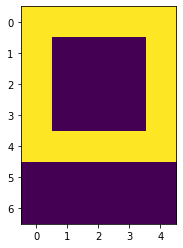

In [100]:
coords, folds = parse_input('data/day13_example')
paper = get_final_code(coords, folds)
plt.imshow(paper);

In [101]:
coords, folds = parse_input('data/day13')
paper = get_final_code(coords, folds)
plt.imshow(paper);

---

<a id='day14'><a/>

## --- Day 14: Extended Polymerization ---

##### Part 1: 10 steps

In [102]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
    lines = text.splitlines()
    
    template = lines[0]
    
    rules = [item for item in lines[2:]]
    rules = [(item.split(' -> ')[0], item.split(' -> ')[1]) for item in rules]
    
    return template, rules


def create_mappings(rules):
    return {key: key[0] + value for key, value in dict(rules).items()}


def map_polymer(pair, mappings):
    if pair in mappings:
        return mappings[pair]
    else:
        return pair[0]


def repr_polymer(polymer):
    if len(polymer) < 30:
        return polymer
    else:
        return polymer[:16] + "......" + polymer[-15:]
    

def compute_polymer(template, mappings, steps, print_polymers=False):
    
    if print_polymers:
        print(f"Step 0: {repr_polymer(template)}")
    
    for step in range(steps):
        new_template = ''
        for i in range(len(template)-1):
            pair = template[i:i+2]
            new_template += map_polymer(pair, mappings)
        new_template += template[-1]
        if print_polymers:
            print(f"Step {step+1}: {repr_polymer(new_template)}")
        template = new_template
        
    return template


def compute_result(polymer):
    reps = np.array(list(Counter(polymer).values()))
    return reps.max() - reps.min()

In [103]:
STEPS = 10
template, rules = parse_input('data/day14_example')
mappings = create_mappings(rules)
polymer = compute_polymer(template, mappings, STEPS, print_polymers=True)
compute_result(polymer)

Step 0: NNCB
Step 1: NCNBCHB
Step 2: NBCCNBBBCBHCB
Step 3: NBBBCNCCNBBNBNBBCHBHHBCHB
Step 4: NBBNBNBBCCNBCNCC......HCBHHNHCBBCBHCB
Step 5: NBBNBBNBBBNBBNBB......CHBNBBCHBHHBCHB
Step 6: NBBNBBNBBNBBNBBN......HCBHHNHCBBCBHCB
Step 7: NBBNBBNBBNBBNBBN......CHBNBBCHBHHBCHB
Step 8: NBBNBBNBBNBBNBBN......HCBHHNHCBBCBHCB
Step 9: NBBNBBNBBNBBNBBN......CHBNBBCHBHHBCHB
Step 10: NBBNBBNBBNBBNBBN......HCBHHNHCBBCBHCB


1588

In [104]:
STEPS = 10
template, rules = parse_input('data/day14')
mappings = create_mappings(rules)
polymer = compute_polymer(template, mappings, STEPS, print_polymers=True)
compute_result(polymer)

Step 0: BVBNBVPOKVFHBVCSHCFO
Step 1: BSVNBNNOBSVNPNOO......BSVBCCSHHNCHFHO
Step 2: BCSSVSNOBNNONOOK......HKHONCCVHOFKHSO
Step 3: BKCCSKSSVPSKNOOK......VCHSOKFKKPHOSVO
Step 4: BNKFCBCCSCKFSKSS......KFKBPCHSOHSSVKO
Step 5: BNNSKSFCCHBKCBCC......SVOFHOSKSSVFKFO
Step 6: BNNONNSCKFSSFCCB......KFSKSSVOFKKSFHO
Step 7: BNNONOOPNONNSCCK......OKFKKFKFSSFKHSO
Step 8: BNNONOOPNOONOOPP......FFSKSSFKKPHOSVO
Step 9: BNNONOOPNOONOOPP......KFKBPCHSOHSSVKO
Step 10: BNNONOOPNOONOOPP......SVOFHOSKSSVFKFO


2703

##### Part 2: 40 steps (optimization refactor is needed)

Strategy: count pairs

In [106]:
def create_mappings(rules):
    return {key: (key[0] + value, value + key[1]) for key, value in dict(rules).items()}


def count_pairs(template, mappings, steps):
    
    pairs_counter = Counter([template[i] + template[i+1] for i in range(len(template) - 1)])
    
    for i in range(steps):
        d = defaultdict(int)
        for item, value in pairs_counter.items():
            item1, item2 = mappings[item]
            d[item1] += value
            d[item2] += value
        pairs_counter = Counter(d)
    return pairs_counter
        

def count_letters(pairs_counter):
    
    l = defaultdict(int)
    for key, value in pairs_counter.items():
        l[key[0]] += value
        l[key[1]] += value

    letter_counter = {key: (value + 1)//2 if value%2!=0 else value//2 for key, value in l.items()}
    return letter_counter


def compute_result(letter_counter):
    reps = np.array(list(letter_counter.values()))
    return reps.max() - reps.min()

In [107]:
template, rules = parse_input('data/day14_example')
mappings = create_mappings(rules)
pairs_counter = count_pairs(template, mappings, 40)
letter_counter = count_letters(pairs_counter)
compute_result(letter_counter)

2188189693529

In [108]:
template, rules = parse_input('data/day14')
mappings = create_mappings(rules)
pairs_counter = count_pairs(template, mappings, 40)
letter_counter = count_letters(pairs_counter)
compute_result(letter_counter)

2984946368465

---

<a id='day15'><a/>

## --- Day 15:  Chiton ---

##### Part 1: Cheapest path of a Graph going from A to B
##### Part 2: Same but SIZE of puzzle 25x

**NOTES**:
- First approach was using the utilities of the networkx python library. This library has some algorithm implementations to find shortest paths. The result was NOT OK for the large puzzles, so I assume the solutions are only partial in favor of performance. BUT THEY ARE NOT EXACT.

- Second approach was develop my own implementation of the dijkstraa algorithm over the graph of networkx. The result was EXACT but the performance is not good for large puzzles.

- Third approach was improve performance with priority-queues over the graph. Very little improvement

- Final solution: skip the graph part and use standard data structures (inspiration was found in reddit)

##### FISRT APPROACH: NETWORKX algorithms

In [109]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
    lines = text.splitlines()
    
    lines = [list(row) for row in lines]
    puzzle_input = np.array(lines, dtype='int')
    return puzzle_input


def resize_puzzle_input(puzzle_input):
    board = [puzzle_input]
    for i in range(1,5):
        puzzle_input_extension = (puzzle_input + i)
        puzzle_input_extension[puzzle_input_extension > 9] = puzzle_input_extension[puzzle_input_extension > 9] % 10 + 1
        board.append(puzzle_input_extension)
    puzzle_input_horizontal = np.concatenate(board, axis=1)

    board = [puzzle_input_horizontal]
    for i in range(1,5):
        puzzle_input_extension = (puzzle_input_horizontal + i)
        puzzle_input_extension[puzzle_input_extension > 9] = puzzle_input_extension[puzzle_input_extension > 9] % 10 + 1
        board.append(puzzle_input_extension)
    puzzle_input_resized = np.concatenate(board, axis=0)

    return puzzle_input_resized


def create_graph_namespace(puzzle_input):
    n_x = puzzle_input.shape[0]
    n_y = puzzle_input.shape[1]
    nodes = np.zeros((n_x, n_y), dtype=int)
    for i in range(n_x):
        for j in range(n_y):
            nodes[i, j] = i * n_y + j
    
    return nodes
    

def get_source_and_target_names(nodes):
    return nodes[0, 0], nodes[-1, -1]


def create_graph(puzzle_input, nodes):
    n_x = puzzle_input.shape[0]
    n_y = puzzle_input.shape[1]    
    G = nx.Graph()
    for i in range(n_x):
        for j in range(n_y - 1):
            G.add_edge(nodes[i][j], nodes[i][j+1], weight=puzzle_input[i][j+1])
    for i in range(n_x - 1):
        for j in range(n_y):
            G.add_edge(nodes[i][j], nodes[i+1][j], weight=puzzle_input[i+1][j])
    return G

    
def shortest_path(G, source, target, print_path=False):
    
    shortest_path = nx.shortest_path(G, source=source, target=target, weight='weight')
    if print_path:
        print(shortest_path)
    return shortest_path


def compute_shortest_path_length(puzzle_input, nodes, shortest_path):
    p = [puzzle_input[nodes==item][0] for item in shortest_path]
    return sum(p[1:])
    

In [110]:
puzzle_input = parse_input('data/day15_example')
nodes = create_graph_namespace(puzzle_input)
G = create_graph(puzzle_input, nodes)
source, target = get_source_and_target_names(nodes)
short_path = shortest_path(G, source, target, print_path=True)
compute_shortest_path_length(puzzle_input, nodes, short_path)

[0, 10, 20, 21, 22, 23, 24, 25, 26, 36, 37, 47, 48, 58, 68, 78, 88, 89, 99]


40

In [111]:
puzzle_input = parse_input('data/day15')
nodes = create_graph_namespace(puzzle_input)
G = create_graph(puzzle_input, nodes)
source, target = get_source_and_target_names(nodes)
short_path = shortest_path(G, source, target, print_path=True)
compute_shortest_path_length(puzzle_input, nodes, short_path)

[0, 100, 200, 300, 301, 302, 402, 403, 503, 504, 505, 506, 507, 508, 509, 609, 709, 710, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 719, 720, 721, 621, 622, 623, 624, 625, 626, 726, 826, 926, 1026, 1027, 1127, 1227, 1228, 1328, 1428, 1429, 1529, 1629, 1630, 1730, 1830, 1930, 2030, 2130, 2230, 2231, 2232, 2233, 2234, 2334, 2335, 2435, 2535, 2635, 2735, 2835, 2935, 2936, 3036, 3136, 3236, 3336, 3335, 3435, 3535, 3635, 3735, 3835, 3935, 3936, 3937, 4037, 4137, 4237, 4238, 4338, 4438, 4538, 4638, 4639, 4739, 4839, 4840, 4940, 5040, 5041, 5042, 5043, 5044, 5144, 5145, 5146, 5147, 5247, 5347, 5348, 5448, 5449, 5450, 5451, 5551, 5552, 5452, 5453, 5454, 5455, 5456, 5457, 5557, 5558, 5658, 5659, 5759, 5859, 5959, 6059, 6159, 6160, 6161, 6261, 6361, 6362, 6363, 6463, 6563, 6663, 6664, 6764, 6864, 6865, 6866, 6966, 6967, 7067, 7167, 7168, 7268, 7368, 7468, 7469, 7569, 7570, 7670, 7770, 7870, 7970, 8070, 8170, 8171, 8271, 8371, 8471, 8571, 8572, 8672, 8772, 8872, 8873, 8973, 9073, 9074, 907

738

In [112]:
puzzle_input = parse_input('data/day15_example')
puzzle_input_resized = resize_puzzle_input(puzzle_input)
nodes = create_graph_namespace(puzzle_input_resized)
G = create_graph(puzzle_input_resized, nodes)
source, target = get_source_and_target_names(nodes)
short_path = shortest_path(G, source, target, print_path=True)
compute_shortest_path_length(puzzle_input_resized, nodes, short_path)

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 601, 602, 652, 653, 703, 753, 803, 804, 805, 806, 807, 808, 809, 859, 909, 910, 911, 912, 962, 963, 964, 1014, 1064, 1065, 1115, 1116, 1166, 1216, 1266, 1267, 1268, 1269, 1319, 1369, 1419, 1420, 1421, 1422, 1472, 1473, 1474, 1524, 1525, 1526, 1527, 1577, 1627, 1677, 1678, 1679, 1729, 1730, 1731, 1732, 1782, 1832, 1833, 1883, 1884, 1934, 1984, 1985, 1986, 1987, 2037, 2087, 2137, 2187, 2188, 2189, 2190, 2191, 2241, 2291, 2341, 2342, 2392, 2393, 2394, 2395, 2345, 2346, 2347, 2348, 2398, 2448, 2498, 2499]


320

In [113]:
puzzle_input = parse_input('data/day15')
puzzle_input_resized = resize_puzzle_input(puzzle_input)
nodes = create_graph_namespace(puzzle_input_resized)
G = create_graph(puzzle_input_resized, nodes)
source, target = get_source_and_target_names(nodes)
short_path = shortest_path(G, source, target, print_path=False)
compute_shortest_path_length(puzzle_input_resized, nodes, short_path)

3085

##### SECOND APPROACH: Dijstra implementation over networkx graph

###### Dijkstra's Algorithm implementation

```python
function Dijkstra(Graph, source):

    create vertex set Q

    for each vertex v in Graph:            
        dist[v] ← INFINITY                 
        prev[v] ← UNDEFINED                
        add v to Q                     
    dist[source] ← 0                       

    while Q is not empty:
        u ← vertex in Q with min dist[u]   

        remove u from Q

        for each neighbor v of u still in Q:
            alt ← dist[u] + length(u, v)
            if alt < dist[v]:              
                dist[v] ← alt
                prev[v] ← u

    return dist[], prev[]
```

In [114]:
def dijkstra(G, source, target):
    
    # create results dataframe
    df = pd.DataFrame({'NODE': G.nodes, 'DISTANCE': np.inf, 'PREVIOUS': 'NA', 'VISITED': False})
    df.set_index('NODE', inplace=True)

    # initialize for source
    df.loc[source, 'DISTANCE'] = 0
    df.loc[source, 'VISITED'] = True

    current_node_distance = 0
    unvisited = df[df['VISITED']==False].index
    adjacents = [(u, v, w) for (u, v, w) in G.edges.data('weight') if v in G[source] and v in unvisited]

    for _, v, w in adjacents:
        df.loc[v, 'DISTANCE'] = current_node_distance + w
        df.loc[v, 'PREVIOUS'] = source

    # loop until target is reached
    while df.loc[target, 'VISITED'] == False:
        
        visited = df['VISITED'].sum()
        if visited % (target // 10 + 1) == 0:
            print(f'Visited {visited*100 // target}% of nodes')
        
        filtered_df = df[df['VISITED']==False]
        current_node = filtered_df[filtered_df['DISTANCE']==filtered_df['DISTANCE'].min()].index[0]
        df.loc[current_node, 'VISITED'] = True
        current_node_distance = df.loc[current_node, 'DISTANCE']

        unvisited = df[df['VISITED']==False].index
        adjacents = [(u, v, w) for (u, v, w) in G.edges.data('weight') if v in G[current_node] and v in unvisited]

        for _, v, w in adjacents:
            new_distance = current_node_distance + w
            if new_distance < df.loc[v, 'DISTANCE']:
                df.loc[v, 'DISTANCE'] = current_node_distance + w
                df.loc[v, 'PREVIOUS'] = current_node
                
    return df


def get_shortest_path_lenght_dijkstra(df, target):
    return df.loc[target, 'DISTANCE']

In [115]:
puzzle_input = parse_input('data/day15_example')
nodes = create_graph_namespace(puzzle_input)
G = create_graph(puzzle_input, nodes)
source, target = get_source_and_target_names(nodes)
df = dijkstra(G, source, target)
get_shortest_path_lenght_dijkstra(df, target)

Visited 10% of nodes
Visited 20% of nodes
Visited 30% of nodes
Visited 40% of nodes
Visited 50% of nodes
Visited 60% of nodes
Visited 70% of nodes
Visited 80% of nodes
Visited 90% of nodes


40.0

In [116]:
puzzle_input = parse_input('data/day15')
nodes = create_graph_namespace(puzzle_input)
G = create_graph(puzzle_input, nodes)
source, target = get_source_and_target_names(nodes)
df = dijkstra(G, source, target)
get_shortest_path_lenght_dijkstra(df, target)

Visited 10% of nodes
Visited 20% of nodes
Visited 30% of nodes
Visited 40% of nodes
Visited 50% of nodes
Visited 60% of nodes
Visited 70% of nodes
Visited 80% of nodes
Visited 90% of nodes


720.0

In [165]:
puzzle_input = parse_input('data/day15_example')
puzzle_input_resized = resize_puzzle_input(puzzle_input)
nodes = create_graph_namespace(puzzle_input_resized)
G = create_graph(puzzle_input_resized, nodes)
source, target = get_source_and_target_names(nodes)
df = dijkstra(G, source, target)
get_shortest_path_lenght_dijkstra(df, target)

Visited 10% of nodes
Visited 20% of nodes
Visited 30% of nodes
Visited 40% of nodes
Visited 50% of nodes
Visited 60% of nodes
Visited 70% of nodes
Visited 80% of nodes
Visited 90% of nodes


315.0

In [166]:
# TOO SLOW
puzzle_input = parse_input('data/day15')
puzzle_input_resized = resize_puzzle_input(puzzle_input)
nodes = create_graph_namespace(puzzle_input_resized)
G = create_graph(puzzle_input_resized, nodes)
source, target = get_source and_target_names(nodes)
df = dijkstra(G, source, target)
get_shortest_path_lenght_dijkstra(df, target)

KeyboardInterrupt: 

##### THIRD APPROACH: Dijstra implementation over networkx graph using Priority Queues

###### Dijkstra's Algorithm with priority queues

```python
function Dijkstra(Graph, source):
    
    dist[source] ← 0 
    
    create vertex priority queue Q

    for each vertex v in Graph:            
        if v != source:
            dist[v] ← INFINITY                 
            prev[v] ← UNDEFINED                
            
        Q.add_with_priority(v, dist[v])                     
                          

    while Q is not empty:
        u ← Q.extract_min()   

        remove u from Q

        for each neighbor v of u:
            alt ← dist[u] + length(u, v)
            if alt < dist[v]:              
                dist[v] ← alt
                prev[v] ← u
                Q.decrease_priority(v, alt)

    return dist, prev
```

In [117]:
import heapq
def dijkstra_heapq(G, source, target):
    
    pq = []
    entry_finder = {} 
    counter = itertools.count()
    REMOVED = '<removed-node>'
    
    def add_node_to_heap(node, distance):
        'Add a new node or update the priority of an existing task'
        if node in entry_finder:
            remove_node_from_heap(node)
        count = next(counter)
        entry = [distance, count, node]
        entry_finder[node] = entry
        heapq.heappush(pq, entry)

    def remove_node_from_heap(node):
        'Mark an existing task as REMOVED.  Raise KeyError if not found.'
        entry = entry_finder.pop(node)
        entry[-1] = REMOVED
    
    # fill the priority queue and the entry-finder
    for node in G.nodes:
        if node == 0:
            add_node_to_heap(0, 0)
        else:
            add_node_to_heap(node, len(G.nodes))   #len(G.nodes) is a big enough number

            
    while pq:
        distance, count, node = heapq.heappop(pq)
        
        if count%1000==0 and count!=0:
            print('.', end='')
        
        if node is not REMOVED:
            adjacents = [(u, v, w) for (u, v, w) in G.edges.data('weight') if v in G[node]]
            for _, v, w in adjacents:
                new_distance = distance + w
                if new_distance < entry_finder[v][0]:
                    add_node_to_heap(v, new_distance)
    
    return entry_finder


def get_shortest_path_lenght_dijkstra(entry_finder, target):
    return entry_finder[target][0]

In [118]:
puzzle_input = parse_input('data/day15_example')
nodes = create_graph_namespace(puzzle_input)
G = create_graph(puzzle_input, nodes)
source, target = get_source_and_target_names(nodes)
node_distances = dijkstra_heapq(G, source, target)
get_shortest_path_lenght_dijkstra(node_distances, target)

40

In [255]:
puzzle_input = parse_input('data/day15')
nodes = create_graph_namespace(puzzle_input)
G = create_graph(puzzle_input, nodes)
source, target = get_source_and_target_names(nodes)
node_distances = dijkstra_heapq(G, source, target)
get_shortest_path_lenght_dijkstra(node_distances, target)

...................

720

In [256]:
puzzle_input = parse_input('data/day15_example')
puzzle_input_resized = resize_puzzle_input(puzzle_input)
nodes = create_graph_namespace(puzzle_input_resized)
G = create_graph(puzzle_input_resized, nodes)
source, target = get_source_and_target_names(nodes)
node_distances = dijkstra_heapq(G, source, target)
get_shortest_path_lenght_dijkstra(node_distances, target)

....

315

In [258]:
# TOO SLOW
puzzle_input = parse_input('data/day15')
puzzle_input_resized = resize_puzzle_input(puzzle_input)
nodes = create_graph_namespace(puzzle_input_resized)
G = create_graph(puzzle_input_resized, nodes)
source, target = get_source_and_target_names(nodes)
node_distances = dijkstra_heapq(G, source, target)
get_shortest_path_lenght_dijkstra(node_distances, target)

.

KeyboardInterrupt: 

##### FINAL APPROACH: Dijstra implementation using Priority Queues (on standard data structures)

In [119]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
    lines = text.splitlines()
    
    lines = [list(row) for row in lines]
    puzzle_input = np.array(lines, dtype='int')
    return puzzle_input


def resize_puzzle_input(puzzle_input):
    board = [puzzle_input]
    for i in range(1,5):
        puzzle_input_extension = (puzzle_input + i)
        puzzle_input_extension[puzzle_input_extension > 9] = puzzle_input_extension[puzzle_input_extension > 9] % 10 + 1
        board.append(puzzle_input_extension)
    puzzle_input_horizontal = np.concatenate(board, axis=1)

    board = [puzzle_input_horizontal]
    for i in range(1,5):
        puzzle_input_extension = (puzzle_input_horizontal + i)
        puzzle_input_extension[puzzle_input_extension > 9] = puzzle_input_extension[puzzle_input_extension > 9] % 10 + 1
        board.append(puzzle_input_extension)
    puzzle_input_resized = np.concatenate(board, axis=0)

    return puzzle_input_resized


def build_chiton_dict(puzzle_input):
    n_x, n_y = puzzle_input.shape
    chiton = {}
    for i in range(n_x):
        for j in range(n_y):
            chiton[(i, j)] = puzzle_input[i, j]
    return chiton


def dijkstra_heapq(chiton):
    source = (0,0)
    target = max(chiton)

    distances = {} 
    for k,v in chiton.items(): 
        distances[k] = float('inf') 
    distances[source] = 0 
    pq = [(0,source)]

    d = [(0,1), (1,0), (-1,0), (0,-1)] 
    while len(pq) > 0: 
        current_distance, current_node = heapq.heappop(pq) 
        if current_distance > distances[current_node]: 
            continue
        x, y = current_node 
        for dx, dy in d: 
            x1, y1 = x + dx, y + dy 
            if 0 <= x1 <= target[0] and 0 <= y1 <= target[1]: 
                cost = current_distance + chiton[(x1,y1)] 
                if cost < distances[(x1,y1)]: 
                    distances[(x1,y1)] = cost 
                    heapq.heappush(pq, (cost, (x1,y1)))

    return distances

In [120]:
puzzle_input = parse_input('data/day15_example')
chiton = build_chiton_dict(puzzle_input)
distances = dijkstra_heapq(chiton)
distances[max(chiton)]

40

In [121]:
puzzle_input = parse_input('data/day15')
chiton = build_chiton_dict(puzzle_input)
distances = dijkstra_heapq(chiton)
distances[max(chiton)]

720

In [122]:
puzzle_input = parse_input('data/day15_example')
puzzle_input = resize_puzzle_input(puzzle_input)
chiton = build_chiton_dict(puzzle_input)
distances = dijkstra_heapq(chiton)
distances[max(chiton)]

315

In [123]:
puzzle_input = parse_input('data/day15')
puzzle_input = resize_puzzle_input(puzzle_input)
chiton = build_chiton_dict(puzzle_input)
distances = dijkstra_heapq(chiton)
distances[max(chiton)]

3025

---

<a id='day16'><a/>

## --- Day 16:  Packet Decoder ---

##### Part 1:

In [124]:

Packet = namedtuple("Packet", ("version", "type_id", "value", "subpackets"))


def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
    return text


def get_code_from_hex(hex_str):
    return bin(int(hex_str, 16))[2:].zfill(len(hex_str) * 4)


def decode_packet(binary_input, i):
    """Binary input is the whole input. 
       i is the position where starts the packet to be decoded
       Returns the Packet and the new position i inmediately after the packet ends
    """
    
    version = int(binary_input[i:(i + 3)], 2)
    type_id = int(binary_input[(i + 3):(i + 6)], 2)
    i += 6  

    if type_id == 4:   # literal value
        value, i = get_literal_value(binary_input, i)
        return Packet(version, type_id, value, []), i
    
    # else will be an operand
    length_type_id = binary_input[i]
    i += 1
    
    if length_type_id == '0':
        subpackets, i = get_subpackets_by_length(binary_input, i)
    else:
        subpackets, i = get_subpackets_by_number(binary_input, i)
    
    value = calculate_value(type_id, subpackets)  # at the moment
    return Packet(version, type_id, value, subpackets), i 


def get_literal_value(binary_input, i):
    """Binary input is the whole input. 
       i is the position where starts the packet to be decoded
       Returns the literal value of the packet and the new position i inmediately after the packet ends
    """
    value = ''
    while True:
        last_group = binary_input[i] == '0'
        value += binary_input[(i + 1):(i + 5)]
        i += 5
        if last_group:
            break
    return int(value, 2), i
    
        
def get_subpackets_by_length(binary_input, i):
    """Binary input is the whole input. 
       i is the position where starts the packet to be decoded
       Returns a list of subpackets and the new position i inmediately after the packet ends
    """    
    subpackets = []
    total_length = int(binary_input[i:(i + 15)], 2)
    i += 15
    end_i = i + total_length
    
    while i < end_i:
        subpacket, i = decode_packet(binary_input, i)
        subpackets.append(subpacket)
    
    return subpackets, i


def get_subpackets_by_number(binary_input, i):
    """Binary input is the whole input. 
       i is the position where starts the packet to be decoded
       Returns a list of subpackets and the new position i inmediately after the packet ends
    """    
    subpackets = []
    num_packets = int(binary_input[i:(i + 11)], 2)
    i += 11
    
    for _ in range(num_packets):
        subpacket, i = decode_packet(binary_input, i)
        subpackets.append(subpacket)
    
    return subpackets, i


def calculate_value(type_id, subpackets):
    
    values = [packet.value for packet in subpackets]
    if type_id == 0:
        return sum(values)
    if type_id == 1:
        return np.prod(values)
    if type_id == 2:
        return min(values)
    if type_id == 3:
        return max(values)
    if type_id == 5:
        return int(values[0] > values[1])
    if type_id == 6:
        return int(values[0] < values[1])
    if type_id == 7:
        return int(values[0] == values[1])


def get_sum_versions(packet):
    total = packet.version
    for subpacket in packet.subpackets:
        total += get_sum_versions(subpacket)
    return total
    

In [125]:
binary_input = get_code_from_hex('D2FE28')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Sum of Versions: {get_sum_versions(packet)},\nTotal Value: {packet.value}, \n{packet}')

110100101111111000101000
Sum of Versions: 6,
Total Value: 2021, 
Packet(version=6, type_id=4, value=2021, subpackets=[])


In [126]:
binary_input = get_code_from_hex('38006F45291200')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Sum of Versions: {get_sum_versions(packet)},\nTotal Value: {packet.value}, \n{packet}')

00111000000000000110111101000101001010010001001000000000
Sum of Versions: 9,
Total Value: 1, 
Packet(version=1, type_id=6, value=1, subpackets=[Packet(version=6, type_id=4, value=10, subpackets=[]), Packet(version=2, type_id=4, value=20, subpackets=[])])


In [127]:
binary_input = get_code_from_hex('EE00D40C823060')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Sum of Versions: {get_sum_versions(packet)},\nTotal Value: {packet.value}, \n{packet}')

11101110000000001101010000001100100000100011000001100000
Sum of Versions: 14,
Total Value: 3, 
Packet(version=7, type_id=3, value=3, subpackets=[Packet(version=2, type_id=4, value=1, subpackets=[]), Packet(version=4, type_id=4, value=2, subpackets=[]), Packet(version=1, type_id=4, value=3, subpackets=[])])


In [128]:
binary_input = get_code_from_hex('8A004A801A8002F478')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Sum of Versions: {get_sum_versions(packet)},\nTotal Value: {packet.value}, \n{packet}')

100010100000000001001010100000000001101010000000000000101111010001111000
Sum of Versions: 16,
Total Value: 15, 
Packet(version=4, type_id=2, value=15, subpackets=[Packet(version=1, type_id=2, value=15, subpackets=[Packet(version=5, type_id=2, value=15, subpackets=[Packet(version=6, type_id=4, value=15, subpackets=[])])])])


In [129]:
binary_input = get_code_from_hex('620080001611562C8802118E34')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Sum of Versions: {get_sum_versions(packet)},\nTotal Value: {packet.value}, \n{packet}')

01100010000000001000000000000000000101100001000101010110001011001000100000000010000100011000111000110100
Sum of Versions: 12,
Total Value: 46, 
Packet(version=3, type_id=0, value=46, subpackets=[Packet(version=0, type_id=0, value=21, subpackets=[Packet(version=0, type_id=4, value=10, subpackets=[]), Packet(version=5, type_id=4, value=11, subpackets=[])]), Packet(version=1, type_id=0, value=25, subpackets=[Packet(version=0, type_id=4, value=12, subpackets=[]), Packet(version=3, type_id=4, value=13, subpackets=[])])])


In [130]:
binary_input = get_code_from_hex('C0015000016115A2E0802F182340')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Sum of Versions: {get_sum_versions(packet)},\nTotal Value: {packet.value}, \n{packet}')

1100000000000001010100000000000000000001011000010001010110100010111000001000000000101111000110000010001101000000
Sum of Versions: 23,
Total Value: 46, 
Packet(version=6, type_id=0, value=46, subpackets=[Packet(version=0, type_id=0, value=21, subpackets=[Packet(version=0, type_id=4, value=10, subpackets=[]), Packet(version=6, type_id=4, value=11, subpackets=[])]), Packet(version=4, type_id=0, value=25, subpackets=[Packet(version=7, type_id=4, value=12, subpackets=[]), Packet(version=0, type_id=4, value=13, subpackets=[])])])


In [131]:
binary_input = get_code_from_hex('A0016C880162017C3686B18A3D4780')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Sum of Versions: {get_sum_versions(packet)},\nTotal Value: {packet.value}, \n{packet}')

101000000000000101101100100010000000000101100010000000010111110000110110100001101011000110001010001111010100011110000000
Sum of Versions: 31,
Total Value: 54, 
Packet(version=5, type_id=0, value=54, subpackets=[Packet(version=1, type_id=0, value=54, subpackets=[Packet(version=3, type_id=0, value=54, subpackets=[Packet(version=7, type_id=4, value=6, subpackets=[]), Packet(version=6, type_id=4, value=6, subpackets=[]), Packet(version=5, type_id=4, value=12, subpackets=[]), Packet(version=2, type_id=4, value=15, subpackets=[]), Packet(version=2, type_id=4, value=15, subpackets=[])])])])


In [132]:
hex_str = parse_input('data/day16')
binary_input = get_code_from_hex(hex_str)
packet = decode_packet(binary_input, 0)[0]
print(f'Sum of Versions: {get_sum_versions(packet)}')

Sum of Versions: 904


##### Part 2:

In [133]:
binary_input = get_code_from_hex('C200B40A82')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Total Value: {packet.value}')

1100001000000000101101000000101010000010
Total Value: 3


In [134]:
binary_input = get_code_from_hex('04005AC33890')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Total Value: {packet.value}')

000001000000000001011010110000110011100010010000
Total Value: 54


In [135]:
binary_input = get_code_from_hex('880086C3E88112')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Total Value: {packet.value}')

10001000000000001000011011000011111010001000000100010010
Total Value: 7


In [136]:
binary_input = get_code_from_hex('CE00C43D881120')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Total Value: {packet.value}')

11001110000000001100010000111101100010000001000100100000
Total Value: 9


In [137]:
binary_input = get_code_from_hex('D8005AC2A8F0')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Total Value: {packet.value}')

110110000000000001011010110000101010100011110000
Total Value: 1


In [138]:
binary_input = get_code_from_hex('F600BC2D8F')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Total Value: {packet.value}')

1111011000000000101111000010110110001111
Total Value: 0


In [139]:
binary_input = get_code_from_hex('9C005AC2F8F0')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Total Value: {packet.value}')

100111000000000001011010110000101111100011110000
Total Value: 0


In [140]:
binary_input = get_code_from_hex('9C0141080250320F1802104A08')
packet = decode_packet(binary_input, 0)[0]
print(binary_input)
print(f'Total Value: {packet.value}')

10011100000000010100000100001000000000100101000000110010000011110001100000000010000100000100101000001000
Total Value: 1


In [141]:
hex_str = parse_input('data/day16')
binary_input = get_code_from_hex(hex_str)
packet = decode_packet(binary_input, 0)[0]
print(f'Total Value: {packet.value}')

Total Value: 200476472872


---

<a id='day17'><a/>

## --- Day 17:  Trick Shot ---

##### Part 1:

In [144]:
Point = namedtuple("Point", ("x", "y"))

def trajectory(dx, dy, starting_point=Point(0, 0)):
    point = starting_point
    while True:
        yield point
        x2 = point.x + dx
        y2 = point.y + dy
        dx = max(dx-1, 0)
        dy -= 1
        point = Point(x2, y2)
        

def point_is_below_target(point, target_area):
    return point.y < target_area['y1']
        
        
def point_is_in_target(point, target_area):
    condition_x = target_area['x1'] <= point.x <= target_area['x2']
    condition_y = target_area['y1'] <= point.y <= target_area['y2']
    return condition_x and condition_y


def shot(dx, dy, target_area, starting_point=Point(0, 0)):
    traj = trajectory(dx, dy)
    max_y = starting_point.y
    for point in traj:
        max_y = point.y if point.y > max_y else max_y
        if point_is_below_target(point, target_area):
            return None
        if point_is_in_target(point, target_area):
            return max_y

        
def get_min_dx(target_area, starting_point=Point(0,0)):
    max_x = np.array([i*(i+1)//2 for i in range(30)])
    min_dx = (max_x > (target_area['x1'] - starting_point.x)).argmax()
    return min_dx


def get_highest_shot(target_area, starting_point=Point(0, 0)):
    min_dx = get_min_dx(target_area)
    max_dx = target_area['x2'] - starting_point.x
    min_dy = target_area['y1'] - starting_point.y
    max_dy = 500
    
    winner = None
    max_y = 0
    for dx in range(min_dx, max_dx+1):
        for dy in range(min_dy, max_dy+1):
            y = shot(dx, dy, target_area)
            if y and y >= max_y:
                winner = (dx, dy)
                max_y = y

    return winner, max_y

In [146]:
target_area = {
    'x1': 20,
    'x2': 30,
    'y1': -10,
    'y2': -5
}
shot(7, 2, target_area)
shot(6, 3, target_area)
shot(9, 0, target_area)
shot(6, 9, target_area)
shot(7, 9, target_area)
shot(17, -4, target_area)

3

6

0

45

45

In [147]:
puzzle_input = 'target area: x=20..30, y=-10..-5'
get_highest_shot(target_area)

((7, 9), 45)

In [148]:
target_area = {
    'x1': 235,
    'x2': 259,
    'y1': -118,
    'y2': -62
}
get_highest_shot(target_area)

((22, 117), 6903)

In [149]:
def get_all_shots(target_area, starting_point=Point(0, 0)):
    
    min_dx = get_min_dx(target_area)
    max_dx = target_area['x2'] - starting_point.x
    min_dy = target_area['y1'] - starting_point.y
    max_dy = 500
    
    valid_results = []
    for dx in range(min_dx, max_dx+1):
        for dy in range(min_dy, max_dy+1):
            y = shot(dx, dy, target_area)
#             print(dx, dy, y)
            if y is not None:
                valid_results.append((dx, dy))

    return len(valid_results)

In [150]:
puzzle_input = 'target area: x=20..30, y=-10..-5'
target_area = {
    'x1': 20,
    'x2': 30,
    'y1': -10,
    'y2': -5
}
get_all_shots(target_area)

112

In [151]:
target_area = {
    'x1': 235,
    'x2': 259,
    'y1': -118,
    'y2': -62
}
get_all_shots(target_area)

2351

---

<a id='day18'><a/>

## --- Day 18:  Snailfish ---

##### Part 1:

In [152]:
Element = namedtuple("Element", ("index", "pair_side", "level", "value"))

In [155]:
class Element():
    
    def __init__(self, level, pair_side, value):
        self.level = level
        self.pair_side = pair_side
        self.value = value
    
    def __repr__(self):
        return f'\nElement: {self.level}, {self.pair_side}, {self.value}'
    
    
class Snailfish_Number():
    
    def __init__(self, elements):
        self.elements = elements
        
    def insert(self, position, element):
        self.elements.insert(position, element)
    
    
    def max_level(self):
        return max([element.level for element in self.elements])
    
    
    def max_value(self):
        return max([element.value for element in self.elements])
    
    
    def element_to_explode(self):
        if self.max_level() > 4:
            for i, (e_left, e_right) in enumerate(zip(self.elements[:-1], self.elements[1:])):
                c1 = e_left.level > 4
                c2 = e_right.level == e_left.level
                c3 = e_left.pair_side == 'left'
                c4 = e_right.pair_side == 'right'

                if c1 and c2 and c3 and c4:
                    return i
        else:
            return -1

    def element_to_split(self):
        if self.max_value() > 9:
            for i, element in enumerate(self.elements):
                if element.value > 9:
                    return i
        else:
            return -1

                
    def explode(self, position):
        current_level = self.elements[position].level
        current_side = self.elements[position].pair_side

        if position == 0:
            self.elements[2].value += self.elements[1].value
            new_element = Element(current_level - 1, 'left', 0)
            self.insert(0, new_element)
            del self.elements[1:3]
            return True

        if position == len(self.elements) - 2:
            self.elements[-3].value += self.elements[-2].value
            new_element = Element(current_level - 1, 'right', 0)
            self.elements.append(new_element)
            del self.elements[-3:-1]
            return True

        previous_level = self.elements[position-1].level
        previous_side = self.elements[position-1].pair_side
        self.elements[position-1].value += self.elements[position].value
        self.elements[position+2].value += self.elements[position+1].value
        if (previous_level == current_level-1) and (previous_side == current_side):
            new_element = Element(current_level - 1, 'right', 0)    
        else:
            new_element = Element(current_level - 1, 'left', 0)    

        self.insert(position, new_element)
        del self.elements[position+1:position+3]
        

    def split(self, position):
        current_level = self.elements[position].level
        current_value = self.elements[position].value
        new_element_left = Element(current_level + 1, 'left', current_value//2)
        new_element_right = Element(current_level + 1, 'right', current_value - current_value//2)
        self.insert(position, new_element_right)
        self.insert(position, new_element_left)
        del self.elements[position+2]

        
    def reduce(self):
        while True:
            if self.element_to_explode() == -1 and self.element_to_split() == -1:
                break
            while self.element_to_explode() >= 0:
                self.explode(self.element_to_explode())
            if self.element_to_split() >= 0:
                self.split(self.element_to_split())

                
    def up_one_level(self):
        for element in self.elements:
            element.level += 1
                
    
    def add(self, other):
        self.up_one_level()
        other.up_one_level()
        self.elements += other.elements
        

    def pair_to_compute(self):
        if len(self.elements) > 0:
            max_level = self.max_level()
            for i, (e_left, e_right) in enumerate(zip(self.elements[:-1], self.elements[1:])):
                c1 = e_left.level == max_level
                c2 = e_right.level == max_level
                c3 = e_left.pair_side == 'left'
                c4 = e_right.pair_side == 'right'

                if c1 and c2 and c3 and c4:
                    return i
        else:
            return -1
        
        
    def compute_pair_magnitude(self, position):
        
        current_level = self.elements[position].level
        current_side = self.elements[position].pair_side
        new_value = self.elements[position].value * 3 + self.elements[position+1].value * 2

        if position == 0:
            new_element = Element(current_level - 1, 'left', new_value)
            self.insert(0, new_element)
            del self.elements[1:3]
            return True

        if position == len(self.elements) - 2:
            new_element = Element(current_level - 1, 'right', new_value)
            self.elements.append(new_element)
            del self.elements[-3:-1]
            return True

        previous_level = self.elements[position-1].level
        previous_side = self.elements[position-1].pair_side
        if (previous_level == current_level-1) and (previous_side == current_side):
            new_element = Element(current_level - 1, 'right', new_value)    
        else:
            new_element = Element(current_level - 1, 'left', new_value)    

        self.insert(position, new_element)
        del self.elements[position+1:position+3]
        
    
    def magnitude(snail):
        
        while len(snail.elements) > 2:
            snail.compute_pair_magnitude(snail.pair_to_compute())
        
        return snail.elements[0].value * 3 + snail.elements[1].value * 2
        
        
    def __repr__(self):
        return str(self.elements)
    
    
def string_to_snailfish_number(s):
    
    elements = []
    level = 0
    pair_side = 'left'
    for ch in s:
        if ch == '[':
            level += 1
            pair_side = 'left'
        elif ch == ']':
            level -= 1
        elif ch == ',':
            pair_side = 'right'
        else:
            elem = Element(level, pair_side, int(ch))
            elements.append(elem)

    return Snailfish_Number(elements)


def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
        lines = text.splitlines()
    return lines
        
        
def addition_list(lines):
    snail = string_to_snailfish_number(lines[0])
    snail.reduce()
    for line in lines[1:]:
        other_snail = string_to_snailfish_number(line)
        snail.add(other_snail)
        snail.reduce()
    return snail

In [156]:
lines = parse_input('data/day18_example')
snail = addition_list(lines)
snail
snail.magnitude()

[
Element: 4, left, 6, 
Element: 4, right, 6, 
Element: 4, left, 7, 
Element: 4, right, 6, 
Element: 4, left, 7, 
Element: 4, right, 7, 
Element: 4, left, 7, 
Element: 4, right, 0, 
Element: 4, left, 7, 
Element: 4, right, 7, 
Element: 4, left, 7, 
Element: 4, right, 7, 
Element: 4, left, 7, 
Element: 4, right, 8, 
Element: 4, left, 9, 
Element: 4, right, 9]

4140

In [157]:
lines = parse_input('data/day18')
snail = addition_list(lines)
snail
snail.magnitude()

[
Element: 4, left, 7, 
Element: 4, right, 7, 
Element: 4, left, 7, 
Element: 4, right, 7, 
Element: 4, left, 7, 
Element: 4, right, 0, 
Element: 4, left, 7, 
Element: 4, right, 7, 
Element: 4, left, 8, 
Element: 4, right, 8, 
Element: 4, left, 8, 
Element: 4, right, 7, 
Element: 4, left, 7, 
Element: 4, right, 8, 
Element: 4, left, 7, 
Element: 4, right, 8]

4289

##### Part 2:

In [158]:
def find_max_magnitude_2_by_2(lines):
    snailfish_numbers = [string_to_snailfish_number(line) for line in lines]
    magnitudes = []
    for i in range(len(snailfish_numbers)):
        for j in range(len(snailfish_numbers)):
            if i != j:
                snaili = deepcopy(snailfish_numbers[i])
                snailj = deepcopy(snailfish_numbers[j])
                snaili.add(snailj)
                snaili.reduce()
                m = snaili.magnitude()
                magnitudes.append(m)

    return max(magnitudes)

In [159]:
lines = parse_input('data/day18_example')
find_max_magnitude_2_by_2(lines)

3993

In [160]:
lines = parse_input('data/day18')
find_max_magnitude_2_by_2(lines)

4807

---

<a id='day19'><a/>

## --- Day 19:  Beacon Scanner ---

##### Part 1:

```python
# Consider scanner 0 as the reference and try to reference all beacons to scanner 0 coordinate system. Add together all the beacons of all the scanners and deduplicate to find the number of beacons.

1. Find Pairs of overlapping scanners by comparing distances between their beacons. There are at least 12 beacons that are the same, so we will be able to find the distance between them in both scanners. 

2. Try to find Pairs where 1 rotation is known and the other is unknown. Test all 24 rotations to the unknown scanner until we get a minimum of common difference vectors between beacons to both scanners. Repeat to get the rotation of all scanners.

3. Try to find Pairs where 1 traslation is known and the other is unknown. Test all pairs of beacons from both scanners until we get a matching result, this is, a beacon that is the same for both scanners. Apply the traslation to all the beacons to reference them to (0,0,0)

4. Count difference beacons once all of them are in global reference coordinates.
```

In [161]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
        lines = text.splitlines()
        
    input_data = {}
    for line in lines:
        if 'scanner' in line:
            scanner = [int(s) for s in line.split(' ') if s.isdigit()][0]
            input_data[scanner] = []
            continue
        if line == '':
            continue
        coordinates = np.array(line.split(','), dtype='int')
        input_data[scanner].append(coordinates)

    return {key: np.array(value, dtype=int) for key, value in input_data.items()}


def get_number_of_coincident_values(a1, a2):
    a = np.concatenate((a1, a2))
    return len([item for item, count in Counter(a).items() if count > 1])


def get_number_of_coincident_vectors(v1, v2):
    a = np.concatenate((v1, v2))
    new_a = [tuple(row) for row in a]
    return a.shape[0] - np.unique(new_a, axis=0).shape[0]


# 24 ROTATION MATRICES FROM SCIPY LIB 
rotation_matrices = scipy.spatial.transform.Rotation.create_group("O").as_matrix()
rotation_matrices = rotation_matrices.astype(int)
def rotate_beacons(beacons, rotation):
    return beacons.dot(rotation_matrices[rotation])

In [162]:
class System:
    
    def __init__(self):
        self.scanners = []
        self.beacons = None
        
    def get_overlapping_scanners(self):
        result = []
        for scanner_1 in self.scanners:
            for scanner_2 in self.scanners:
                if scanner_1.id < scanner_2.id:
                    if get_number_of_coincident_values(scanner_1.distances_vector, scanner_2.distances_vector) > 55:
                        result.append((scanner_1, scanner_2))
        return result

    
    def get_global_beacons(self):
        a = np.concatenate(list((scanner.global_beacons for scanner in system.scanners)))
        new_a = [tuple(row) for row in a]
        self.beacons = np.unique(new_a, axis=0)
        
        
        
class Scanner:
    
    def __init__(self, id):
        self.id = id
        self.position = None
        self.rotation = None
        self.beacons = None
        self.rotated_beacons = None
        self.global_beacons = None
        self.difference_matrix = None
        self.difference_vectors = None
        self.distances_vector = None
        
    
    def __str__(self):
        return str(self.id)
    
    def __repr__(self):
        return str(self.id) 
    
    
    @staticmethod
    def vector_difference(v1, v2):
        return ((v2[0]-v1[0], v2[1]-v1[1], v2[2]-v1[2]))

    
    def get_difference_matrix(self, rotated=False):
        if rotated:
            beacons = self.rotated_beacons
        else:
            beacons = self.beacons
        num_beacons = beacons.shape[0]
        vectors_matrix = np.zeros((num_beacons, num_beacons, 3), dtype='int')
        for i in range(num_beacons):
            for j in range(i):
                vectors_matrix[i, j] = self.vector_difference(beacons[i], beacons[j])
        return vectors_matrix
    
    
    def get_difference_vectors(self, rotated=False):
        if rotated:
            difference_matrix = self.get_difference_matrix(rotated=True)
        else:
            difference_matrix = self.get_difference_matrix(rotated=False)

        difference_vectors = difference_matrix.reshape((-1,3))
        difference_vectors = difference_vectors[~np.all(difference_vectors == 0, axis=1)]
        self.difference_vectors = difference_vectors
        return difference_vectors
    
    
    def get_distances_vector(self):
        dist_vector = np.apply_along_axis(np.linalg.norm, 2, self.difference_matrix).flatten()
        return dist_vector[dist_vector!=0]

        
        
    def get_rotation(self, other):
        vectors_other = other.get_difference_vectors(rotated=True)
        for i in range(24):
            self.rotated_beacons = rotate_beacons(self.beacons, i)
            vectors = self.get_difference_vectors(rotated=True)
            matching_vectors = get_number_of_coincident_vectors(vectors, vectors_other)
            if matching_vectors > 19:
                break
        self.rotation = i  
        
        
    def get_traslation(self, other):
        for other_beacon in other.global_beacons:
            for scanner_beacon in self.rotated_beacons:
                self.position = other_beacon - scanner_beacon
                self.global_beacons = self.position + self.rotated_beacons
                num_overlaps = get_number_of_coincident_vectors(other.global_beacons, self.global_beacons)
                if num_overlaps >= 12:
                    break
            if num_overlaps >=12:
                break
                

In [163]:
input_data = parse_input('data/day19')


system = System()

for key, value in input_data.items():
    scanner = Scanner(key)
    scanner.beacons = value
    scanner.difference_matrix = scanner.get_difference_matrix()
    scanner.distances_vector = scanner.get_distances_vector()
    

    if key==0:  # 1st scanner. We take its position and rotation as global coordinates
        scanner.position = np.zeros(3, dtype=int)
        scanner.rotation = 0
        scanner.rotated_beacons = value
        scanner.global_beacons = value
        
    system.scanners.append(scanner)

In [164]:
print(system.get_overlapping_scanners())

[(0, 13), (0, 25), (0, 29), (1, 18), (1, 36), (1, 38), (2, 6), (2, 19), (2, 27), (3, 14), (3, 32), (4, 27), (5, 6), (5, 13), (5, 27), (7, 9), (7, 16), (7, 17), (8, 11), (9, 12), (9, 14), (9, 15), (9, 21), (9, 39), (10, 11), (10, 19), (10, 30), (12, 31), (13, 23), (13, 26), (13, 35), (15, 16), (15, 23), (15, 35), (15, 38), (16, 22), (16, 24), (17, 21), (17, 24), (18, 22), (18, 28), (20, 29), (20, 33), (20, 37), (21, 35), (22, 34), (22, 38), (23, 27), (24, 26), (24, 35), (30, 31), (30, 36), (30, 38), (31, 39), (38, 39)]


In [165]:
overlapping_pairs = system.get_overlapping_scanners()

# Rotation
limit = 0
while len(overlapping_pairs) > 0 and limit<10000:
    pair = overlapping_pairs[0]
    if pair[0].rotation and pair[1].rotation:
        ov = overlapping_pairs.pop(0)
    elif pair[0].rotation == None and pair[1].rotation == None:
        overlapping_pairs.append(overlapping_pairs.pop(0))
    elif pair[0].rotation != None:
        pair[1].get_rotation(pair[0])
        ov = overlapping_pairs.pop(0)
    else:
        pair[0].get_rotation(pair[1])
        ov = overlapping_pairs.pop(0)
    limit += 1

print([(scanner.id, scanner.rotation) for scanner in system.scanners])

[(0, 0), (1, 19), (2, 0), (3, 17), (4, 11), (5, 23), (6, 20), (7, 6), (8, 10), (9, 13), (10, 5), (11, 4), (12, 9), (13, 18), (14, 7), (15, 12), (16, 1), (17, 22), (18, 21), (19, 15), (20, 2), (21, 14), (22, 16), (23, 8), (24, 8), (25, 11), (26, 9), (27, 11), (28, 1), (29, 22), (30, 5), (31, 17), (32, 0), (33, 10), (34, 5), (35, 21), (36, 19), (37, 8), (38, 10), (39, 7)]


In [166]:
overlapping_pairs = system.get_overlapping_scanners()

# Translation
limit = 0
while len(overlapping_pairs) > 0 and limit<1000:
    pair = overlapping_pairs[0]
    if np.all(pair[0].position) != None and np.all(pair[1].position) != None:
        ov = overlapping_pairs.pop(0)
    elif np.all(pair[0].position) == None and np.all(pair[1].position) == None:
        overlapping_pairs.append(overlapping_pairs.pop(0))
    elif np.all(pair[0].position) != None:
        pair[1].get_traslation(pair[0])
        ov = overlapping_pairs.pop(0)
    else:
        pair[0].get_traslation(pair[1])
        ov = overlapping_pairs.pop(0)
    limit += 1

[(scanner.id, scanner.position) for scanner in system.scanners]

[(0, array([0, 0, 0])),
 (1, array([    3,  2528, -3619])),
 (2, array([-2419,  1273, -1219])),
 (3, array([   44,  5995, -1208])),
 (4, array([-1242,   140, -1263])),
 (5, array([-1336,  1359,   -77])),
 (6, array([-2436,  1259,  -173])),
 (7, array([ 1135,  3637, -1300])),
 (8, array([-3587,  2468, -3682])),
 (9, array([  -85,  3746, -1193])),
 (10, array([-2342,  2492, -2471])),
 (11, array([-3617,  2549, -2451])),
 (12, array([-1196,  3690, -1201])),
 (13, array([  30, 1285, -142])),
 (14, array([  -34,  4891, -1247])),
 (15, array([   10,  2501, -1246])),
 (16, array([ 1230,  2417, -1372])),
 (17, array([1152, 3586,   16])),
 (18, array([ 1212,  2556, -3648])),
 (19, array([-2422,  2548, -1281])),
 (20, array([1122,  119, 1067])),
 (21, array([ -17, 3764,  -44])),
 (22, array([ 1208,  2390, -2397])),
 (23, array([   42,  1301, -1267])),
 (24, array([1149, 2468,   20])),
 (25, array([  -74, -1191,   -81])),
 (26, array([1220, 1180,  -13])),
 (27, array([-1187,  1312, -1285])),
 (28

In [167]:
system.get_global_beacons()
num_beacons = system.beacons.shape[0]
num_beacons

451

##### Part 2: Maximum Manhattan Distance between a pair of beacons

In [168]:
def manhattan_distance(p1, p2):
    return np.abs(p1 - p2).sum()

manhattan_distance(system.scanners[0].position, system.scanners[1].position)

6150

In [169]:
max_distance = 0
for i in range(len(system.scanners)):
    for j in range(i):
        distance = manhattan_distance(system.scanners[i].position, system.scanners[j].position)
        max_distance = distance if max_distance < distance else max_distance
        
print(max_distance)

13184


---

<a id='day20'><a/>

## --- Day 20:  Trench Map ---

##### Part 1:

In [170]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read().replace('#','1').replace('.', '0')
        lines = text.splitlines()
        image_enhancement_algorithm = lines[0]
        
        input_image = np.array([list(line) for line in lines[2:]], dtype=int)
    
    return image_enhancement_algorithm, input_image


def add_zero_pad(input_array, n):
    return np.pad(input_array, [(n,n), (n,n)], mode='constant')


def convolute2d(input_image):
    output_image = np.zeros_like(input_image)
    convo_dim = 3
    for i in range(input_image.shape[1]-convo_dim+1):
        for j in range(input_image.shape[1]-convo_dim+1):
            conv = input_image[i:i+convo_dim, j:j+convo_dim]
            idx = int(str(conv.ravel()).replace(' ', '').replace('[', '').replace(']', ''),2)
            output_image[i+1, j+1] = image_enhancement_algorithm[idx]

    return output_image


def crop(input_image, n):
    return input_image[n:-n, n:-n]


def enhance(input_image, times):
    output_image = input_image
    output_image = add_zero_pad(output_image, 2*times)
    for i in range(times):
        print(i, end=',')
        output_image = convolute2d(output_image)
        output_image = crop(output_image, 1)

    print('')
    plt.imshow(output_image)
    return output_image.sum();

In [171]:
image_enhancement_algorithm, input_image = parse_input('data/day20_example')

In [172]:
image_enhancement_algorithm

'00101001111101010101110110000011101101001110111100111110010000100100110011100111111011100011110010011111001100101111100011010100101100101000000101110111111011101111000101101100100100111110000010100001110010110000001000001001001001100100011011111101111011110101000100000001001010100011110110100000010010001101011001000110101100111010000001010000000101010111101110110001000001111010010010110100001100101111000011000110010001000000101000000010000000110011110010001010100011001010011100111110000000010011110000001001'

In [173]:
plt.imshow(input_image);

0,1,
35


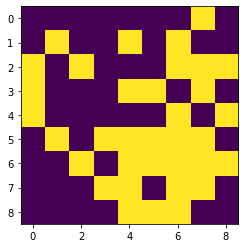

In [174]:
result = enhance(input_image, 2)
print(result)

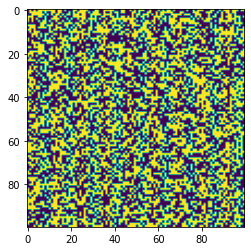

In [175]:
image_enhancement_algorithm, input_image = parse_input('data/day20')
plt.imshow(input_image);

In [176]:
result = enhance(input_image, 2)
print(result)

0,1,
5326


##### Part 2:

In [120]:
# very expensive
image_enhancement_algorithm, input_image = parse_input('data/day20_example')
result = enhance(input_image, 50)
print(result)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,
3351


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,
17096


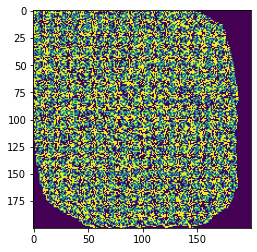

In [121]:
# very expensive
image_enhancement_algorithm, input_image = parse_input('data/day20')
result = enhance(input_image, 50)
print(result)

---

<a id='day21'><a/>

## --- Day 21:  Dirac Dice ---

##### Part 1:

In [177]:
class DeterministicDice:
    def __init__(self):
        self.times_rolled = 0
        
    def roll(self):
        self.times_rolled += 1
        return (self.times_rolled - 1) % 100 + 1


class Player:
        
    def __init__(self, id, starting_position):
        self.id = id
        self.position = starting_position
        self.score = 0
        self.current_dice_rolls = []
        
    def play(self, dice):
        
        self.current_dice_rolls = []
        result = 0
        for i in range(3):
            r = dice.roll()
            self.current_dice_rolls.append(r)
            result += r
         
        self.position = (self.position + result - 1) % 10 + 1
        self.score += self.position
        
    def is_winner(self, target):
        return self.score >= target
        

In [178]:
dice = DeterministicDice()
players = {1: Player(1, 6), 2: Player(2, 10)}
target = 1000

player_to_play = 1


for i in range(1000):
    
    player = players[player_to_play]
    player.play(dice)
#     print(f'Player {player_to_play} rolls {player.current_dice_rolls[0]}+{player.current_dice_rolls[1]}+{player.current_dice_rolls[2]} and moves to space {player.position} for a total score of {player.score}')
    if player.is_winner(target):
        break
    player_to_play = player_to_play % 2 + 1

print(f'Player 1 Score: {players[1].score}')
print(f'Player 2 Score: {players[2].score}')
print(f'Dice has rolled {dice.times_rolled} times')

loser_score = players[1].score if players[1].score < target else players[2].score
final_result = loser_score * dice.times_rolled

print(f'Final Result = {final_result}')

Player 1 Score: 924
Player 2 Score: 1005
Dice has rolled 924 times
Final Result = 853776


##### Part 2:

In [179]:
class DiracDice:
    def __init__(self):
        self.times_rolled = 0
        
    def roll(self):
        self.times_rolled += 1
        return random.choice([1,2,3])

In [180]:
def play(dice, players, target):
    player_to_play = 1
    for i in range(1000):
        player = players[player_to_play]
        player.play(dice)
#         print(f'Player {player_to_play} rolls {player.current_dice_rolls[0]}+{player.current_dice_rolls[1]}+{player.current_dice_rolls[2]} and moves to space {player.position} for a total score of {player.score}')
        if player.is_winner(target):
            winner = player.id
            break
        player_to_play = player_to_play % 2 + 1

#     print(f'Player 1 Score: {players[1].score}')
#     print(f'Player 2 Score: {players[2].score}')
#     print(f'Dice has rolled {dice.times_rolled} times')
    
    return winner, dice.times_rolled

In [181]:
dice = DiracDice()
players = {1: Player(1, 4), 2: Player(2, 8)}
target = 21
winner, times_rolled = play(dice, players, target)
print(winner, times_rolled)

1 27


Aproximately 35 roll dices would be enough to reach a winner in all the possible universes.
<br><br>
Brute force approach would be getting all possible combination of universes (product of 1,2,3 repeating 35 times are 3^35 possible universes) and discard repeated scenarios later. This is computationally unfeasible (overflow).
<br><br>
We will have to build all the combinations step by step, reducing data counting universes with the same state (state involves position and score of each player). This drives us to a maximum of 10x10x21x21 = 44100 different scenarios which is pretty reasonable 

In [182]:
10*10 * 21*21

44100

In [183]:
# Get all combinations of [1, 2, 3] and length 2 
comb = itertools.product([1, 2, 3], repeat=3) 
list_of_comb = ["".join([str(dice) for dice in item]) for item in comb]
len(list_of_comb) # 27
# each time a player play (rolling the dice 3 times, a total of 3*3*3=27 universes are created)

27

To solve this problem I'll use pandas DataFrames, taking advantage of their named columns, joining and aggregating functionalities.

The idea is create a dataframe where each row represeants "ongoing" state (position and score of each player) and the number of times that state has been reached trrough all the universes. When a state represent a finish condition must be taken out from the "ongoing" dataframe and add the number of universes that represents to the leaderboard (either is a player 1 winner state or player 2 winner state)

Starting with one row (the initial position), each time a player plays, the number of rows will be multiplied by 27, generating a new state in each row. Equal states can be reduced in one single row while saving the number of universes where that state is met.

Finish states must be taken apart and the algorithm finish when there are no "ongoing" scenarios".

In [184]:
players = {1: Player(1, 6), 2: Player(2, 10)}
target = 21

initial_data = {'aux_key': 1,
                'P1_position': [players[1].position], 'P1_score': [0],
                'P2_position': [players[2].position], 'P2_score': [0],
                'num_universes': [1]
               }

df = pd.DataFrame(initial_data)
df

aux_key  P1_position  P1_score  P2_position  P2_score  num_universes
0        1            6         0           10         0              1

In [185]:
counter = Counter([sum([int(digit) for digit in item]) for item in list_of_comb])
df_dice = pd.DataFrame({'aux_key': 1, 'dice_score': list(counter.keys()), 'num_times': list(counter.values())})
df_dice

aux_key  dice_score  num_times
0        1           3          1
1        1           4          3
2        1           5          6
3        1           6          7
4        1           7          6
5        1           8          3
6        1           9          1

In [186]:
def play(player_to_play):
    
    global df
    global df_dice
    global leaderboard
    global target
    
    if df.shape[0] == 0:
        print(f'There are {df.shape[0]} ongoing universes. Leaderboard: {leaderboard}')
        return
    
    df = df.merge(df_dice, on='aux_key')   # generate 27 universes for each ongoing universe
    
    # execute the 27 different plays in all universes
    df[f'P{player_to_play}_position'] = (df[f'P{player_to_play}_position'] + df['dice_score'] - 1) % 10 + 1
    df[f'P{player_to_play}_score'] = df[f'P{player_to_play}_score'] + df[f'P{player_to_play}_position']
    df['num_universes'] = df['num_universes'] * df['num_times']
    df = df.iloc[:, :-2] # discard two last columns
    
    # take winner scenarios apart
    condition = df[f'P{player_to_play}_score'] >= target
    df_finish = df[condition]
    leaderboard[f'Player_{player_to_play}'] += df_finish['num_universes'].sum()
    df = df[~condition]
    print(f'There are {df.shape[0]} ongoing universes. Leaderboard: {leaderboard}')
    return

In [187]:
leaderboard = {'Player_1': 0, 'Player_2': 0}
df = pd.DataFrame(initial_data)
player_to_play = 1
for i in range(20):
    play(player_to_play)
    player_to_play = player_to_play % 2 + 1

There are 7 ongoing universes. Leaderboard: {'Player_1': 0, 'Player_2': 0}
There are 49 ongoing universes. Leaderboard: {'Player_1': 0, 'Player_2': 0}
There are 343 ongoing universes. Leaderboard: {'Player_1': 0, 'Player_2': 0}
There are 2401 ongoing universes. Leaderboard: {'Player_1': 0, 'Player_2': 0}
There are 13818 ongoing universes. Leaderboard: {'Player_1': 1279395, 'Player_2': 0}
There are 79524 ongoing universes. Leaderboard: {'Player_1': 1279395, 'Player_2': 53694360}
There are 280590 ongoing universes. Leaderboard: {'Player_1': 3805943139, 'Player_2': 53694360}
There are 859680 ongoing universes. Leaderboard: {'Player_1': 3805943139, 'Player_2': 62746054596}
There are 1696896 ongoing universes. Leaderboard: {'Player_1': 1088278882785, 'Player_2': 62746054596}
There are 2682824 ongoing universes. Leaderboard: {'Player_1': 1088278882785, 'Player_2': 7561361906092}
There are 2897286 ongoing universes. Leaderboard: {'Player_1': 40277448991505, 'Player_2': 7561361906092}
There ar

In [188]:
if leaderboard['Player_1'] > leaderboard['Player_2']:
    print(f"Player 1 wins in more universes: {leaderboard['Player_1']}")
else:
    print(f"Player 2 wins in more universes: {leaderboard['Player_2']}")

Player 1 wins in more universes: 301304993766094


---

<a id='day22'><a/>

## --- Day 22:  Reactor Reboot ---

##### Part 1:

In [189]:
class Step:
    
    def __init__(self, mode: str, x: tuple, y: tuple, z: tuple):
        self.mode = mode
        self.x = x
        self.y = y
        self.z = z
        
    def __repr__(self):
        return f'mode={self.mode}; x={self.x}, y={self.y}, z={self.z}'


class ReactorCore:
    
    def __init__(self, X, Y, Z):
        self.X = X
        self.Y = Y
        self.Z = Z
        self.core = np.zeros((X[1]-X[0]+1, Y[1]-Y[0]+1, Z[1]-Z[0]+1), dtype=bool)
        
    
    def step_is_in_scope(self, step):
        return (step.x[0] < self.X[1] and step.x[1] > self.X[0] and
                step.y[0] < self.Y[1] and step.y[1] > self.Y[0] and
                step.z[0] < self.Z[1] and step.z[1] > self.Z[0])
    
    
    def execute_step(self, step):
        if self.step_is_in_scope(step):
            xt = (step.x[0] - self.X[0], step.x[1] - self.X[0])
            yt = (step.y[0] - self.Y[0], step.y[1] - self.Y[0])
            zt = (step.z[0] - self.Z[0], step.z[1] - self.Z[0])
            self.core[xt[0]:xt[1]+1, yt[0]:yt[1]+1, zt[0]:zt[1]+1] = step.mode
        
    def number_cubes_on(self):
        return self.core.sum()
    

def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
        lines = text.splitlines()
        
        steps = []    
        for line in lines:
            mode = 1 if line.startswith('on') else 0

            line = line.split(' ')[1].split(',')
            line = [item[2:].split('..') for item in line]
            line = [tuple([int(num) for num in pair]) for pair in line]
            x, y, z = line

            step = Step(mode, x, y, z)
            steps.append(step)
        
    return steps
    


In [191]:
steps = parse_input('data/day22_example_0')
for step in steps:
    print(step)

mode=1; x=(10, 12), y=(10, 12), z=(10, 12)
mode=1; x=(11, 13), y=(11, 13), z=(11, 13)
mode=0; x=(9, 11), y=(9, 11), z=(9, 11)
mode=1; x=(10, 10), y=(10, 10), z=(10, 10)


In [192]:
reactor = ReactorCore((9,13), (9,13), (9,13))
for step in steps:
    reactor.execute_step(step)

reactor.number_cubes_on()

39

In [193]:
def initialization_procedure(input_file, X, Y, Z):
    steps = parse_input(input_file)
    reactor = ReactorCore(X, Y, Z)
    for step in steps:
        reactor.execute_step(step)
    return reactor.number_cubes_on()

In [194]:
initialization_procedure('data/day22_example_0', (9,13), (9,13), (9,13))

39

In [195]:
initialization_procedure('data/day22_example_1', (-50,50), (-50,50), (-50,50))

590784

In [196]:
initialization_procedure('data/day22', (-50,50), (-50,50), (-50,50))

596598

##### Part 2:

In [197]:
initialization_procedure('data/day22_example_2', (-50,50), (-50,50), (-50,50))

474140

Brute force approach is not possible because of memory issues:

In [198]:
def get_boundaries(steps):
    Xmin = Ymin = Zmin = np.inf
    Xmax = Ymax = Zmax = - np.inf
    for step in steps:
        Xmin = step.x[0] if step.x[0] < Xmin else Xmin
        Xmax = step.x[1] if step.x[1] > Xmax else Xmax
        Ymin = step.y[0] if step.y[0] < Ymin else Ymin
        Ymax = step.y[1] if step.y[1] > Ymax else Ymax
        Zmin = step.z[0] if step.z[0] < Zmin else Zmin
        Zmax = step.z[1] if step.z[1] > Zmax else Zmax
    return (Xmin, Xmax), (Ymin, Ymax), (Zmin, Zmax)    

In [199]:
steps = parse_input('data/day22_example_1')
X, Y, Z = get_boundaries(steps)
print(X, Y, Z)

(-54112, 23432) (-85059, 81175) (-27449, 53682)


In [53]:
initialization_procedure('data/day22_example_1', X, Y, Z)

MemoryError: Unable to allocate 951. TiB for an array with shape (77545, 166235, 81132) and data type bool

#### Algorithm:

- each step is a cuboid
- each new cuboid may have interseccion with existing cuboids.
- two overlapping "ON" cuboids can be seen as an "UNION" or "ADDITION" of cuboids, this is 1,2,3,4 or 5 cuboids depending on the overlapping volume, all of them with ON value
- one OFF cuboid will turn off the "INTERSECTION" with other cuboid and can be seen as a "SUBSTRACTION"

Track a set of cuboids with ON value. Each additional cuboid will modify that set. Final result is the sum of volumes of all ON cuboids

In [200]:
class Cuboid:
    
    def __init__(self, mode, X, Y, Z):
        self.mode = mode
        self.X = X
        self.Y = Y
        self.Z = Z
        
    def __repr__(self):
        return f'Mode:{self.mode}. X={self.X} Y={self.Y} Z={self.Z}'
        
    def volume(self):
        return (self.X[1]-self.X[0]+1) * (self.Y[1]-self.Y[0]+1) * (self.Z[1]-self.Z[0]+1)
    
    def overlaps(self, other):
        return (self.X[0] <= other.X[1] and self.X[1] >= other.X[0] and
                self.Y[0] <= other.Y[1] and self.Y[1] >= other.Y[0] and
                self.Z[0] <= other.Z[1] and self.Z[1] >= other.Z[0])
     
    
    def __sub__(self, other):
        """
        Self except the intersection between self and other
        """
        
        if not self.overlaps(other):
            return [self]
        
        result = []
        # X low
        if self.X[0] < other.X[0]:
            result.append(Cuboid(1, (self.X[0], other.X[0]-1), (self.Y[0], self.Y[1]), (self.Z[0], self.Z[1])))
            self.X = (other.X[0], self.X[1])
        # X high
        if self.X[1] > other.X[1]:
            result.append(Cuboid(1, (other.X[1]+1, self.X[1]), (self.Y[0], self.Y[1]), (self.Z[0], self.Z[1])))
            self.X = (self.X[0], other.X[1])            
        # Y low
        if self.Y[0] < other.Y[0]:
            result.append(Cuboid(1, (self.X[0], self.X[1]), (self.Y[0], other.Y[0]-1), (self.Z[0], self.Z[1])))
            self.Y = (other.Y[0], self.Y[1])
        # Y high
        if self.Y[1] > other.Y[1]:
            result.append(Cuboid(1, (self.X[0], self.X[1]), (other.Y[1]+1, self.Y[1]), (self.Z[0], self.Z[1])))
            self.Y = (self.Y[0], other.Y[1])                  
        # Z low
        if self.Z[0] < other.Z[0]:
            result.append(Cuboid(1, (self.X[0], self.X[1]), (self.Y[0], self.Y[1]), (self.Z[0], other.Z[0]-1)))
            self.Z = (other.Z[0], self.Z[1])
        # Z high
        if self.Z[1] > other.Z[1]:
            result.append(Cuboid(1, (self.X[0], self.X[1]), (self.Y[0], self.Y[1]), (other.Z[1]+1, self.Z[1])))
            self.Z = (self.Z[0], other.Z[1])
            
        return result

In [201]:
c1 = Cuboid(1, (5,10), (3,7), (2,3))
c2 = Cuboid(1, (3,12), (2,4), (2,2))
print(c1, '- Volume:', c1.volume())
print(c2, '- Volume:', c2.volume())
c1.overlaps(c2)
c1-c2

Mode:1. X=(5, 10) Y=(3, 7) Z=(2, 3) - Volume: 60
Mode:1. X=(3, 12) Y=(2, 4) Z=(2, 2) - Volume: 30


True

[Mode:1. X=(5, 10) Y=(5, 7) Z=(2, 3), Mode:1. X=(5, 10) Y=(3, 4) Z=(3, 3)]

#### Algorithm:

- Operation ADD: Given a list of non overlapping cuboids, add a cuboid. Result: list of cuboids + 0, 1 or more cuboids (non overlapping)

    
        def ADD(list_of_cuboids, cuboid):
            adding_cuboids = [cuboid]
            for c in list_of_cuboids:
                new_adding_cuboids = []
                for cuboid in adding_cuboids:
                    new_adding_cuboids += (cuboid - c)
                adding_cuboids = new_adding_cuboids
            return list_of_cuboids + adding_cuboids




- Operation SUB: Given a list of non overlapping cuboids, substract a cuboid. Result: same list of cuboids, each of them being substracted the cuboid.

        def SUB(list_of_cuboids, cuboid):
            new_list_of_cuboids = []
            for c in list_of_cuboids:
                new_list_of_cuboids += (c - cuboid)
            return new_list_of_cuboids

In [202]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
        lines = text.splitlines()
        
        cuboids = []    
        for line in lines:
            mode = 1 if line.startswith('on') else 0

            line = line.split(' ')[1].split(',')
            line = [item[2:].split('..') for item in line]
            line = [tuple([int(num) for num in pair]) for pair in line]
            x, y, z = line

            cuboid = Cuboid(mode, x, y, z)
            cuboids.append(cuboid)
        
    return cuboids


def add(list_of_cuboids, cuboid):
    """Computes the union of a Cuboid and a list of non overlapping Cuboids, 
    returning the list and the non overlapping subset of cuboid"""
    adding_cuboids = [cuboid]
    for c in list_of_cuboids:
        new_adding_cuboids = []
        for cuboid in adding_cuboids:
            new_adding_cuboids += cuboid - c
        adding_cuboids = new_adding_cuboids
    return list_of_cuboids + adding_cuboids


def sub(list_of_cuboids, cuboid):
    """Substract a cuboid to all elements of a non overlapping list of cuboids"""
    new_list_of_cuboids = []
    for c in list_of_cuboids:
        new_list_of_cuboids += c - cuboid
    return new_list_of_cuboids


def run(steps):
    total_cuboids = [steps[0]]
    for i, step in enumerate(steps[1:]):
#         print('Step:',i+1, total_cuboids, '---', step, end='\n\n')
        if step.mode == 1:
            total_cuboids = add(total_cuboids, step)
        else:
            total_cuboids = sub(total_cuboids, step)
    return sum([cuboid.volume() for cuboid in total_cuboids])

In [205]:
steps = parse_input('data/day22_example_0')
print(run(steps))

39


In [206]:
steps = parse_input('data/day22_example_2')
print(run(steps))

2758514936282235


In [207]:
steps = parse_input('data/day22')
print(run(steps))

1199121349148621


---

<a id='day23'><a/>

## --- Day 23:  Amphipod ---

##### Part 1:

Part 1 solved Manually. Part 2 apparently solved easily manually but the result is not correct (i don't know why).

At the end is too much for me. I take the solutiin from https://github.com/Gravitar64/Advent-of-Code-2021/blob/main/Tag_23.py

---

In [208]:
# IMPOSSIBLE FOR ME. THIS SOLUTION IS COPIED FROM COPIED FROM
# https://github.com/Gravitar64/Advent-of-Code-2021/blob/main/Tag_23.py


from time import perf_counter as pfc
from heapq import heappop, heappush


def read_puzzle(filename):
    with open(filename) as f:
        return ''.join([c for c in f.read() if c in 'ABCD.'])


def can_leave_room(puzzle, room_pos):
    for a in room_pos:
        if puzzle[a] == '.': continue
        return a


def blocked(a,b,puzzle):
    step = 1 if a<b else -1
    for pos in range(a+step, b+step, step):
        if puzzle[pos] != '.': return True    


def get_possible_parc_pos(a,parc,puzzle):
    for b in [pos for pos in parc if puzzle[pos] == '.']:
        if blocked(a,b,puzzle): continue
        yield b


def move(a,b,puzzle):
    p = list(puzzle)
    p[a], p[b] = p[b], p[a]
    return ''.join(p)


def can_enter_room(a,b,amphi,puzzle,room_pos):
    for pos in room_pos:
        if puzzle[pos] == '.': best_pos = pos
        elif puzzle[pos] != amphi: return False
    if not blocked(a,b,puzzle): return best_pos


def possible_moves(puzzle, parc, stepout, target):
    for a in [pos for pos in parc if puzzle[pos] != '.']:
        amphi = puzzle[a]
        b = can_enter_room(a, stepout[amphi], amphi, puzzle, target[amphi])
        if (b):
            yield a,b
    for room in 'ABCD':
        a = can_leave_room(puzzle, target[room])
        if not (a): continue
        for b in get_possible_parc_pos(stepout[room], parc, puzzle):
            yield a,b


def solve(puzzle):
    energy = dict(A=1, B=10, C=100, D=1000)
    parc= [0,1,3,5,7,9,10]
    stepout = dict(A=2, B=4, C=6, D=8)
    target = {r: range(ord(r)-54,len(puzzle),4) for r in 'ABCD'}
    targetI = {v:key for key,val in target.items() for v in val}

    solution = '.'*11+'ABCD'*((len(puzzle)-11)//4)
    heap, seen = [(0,puzzle)], {puzzle:0}
    while heap:
        cost, state = heappop(heap)
        if state == solution: return cost
        for a,b in possible_moves(state, parc, stepout, target):
            p,r = (a,b) if a < b else (b,a)
            distance = abs(stepout[targetI[r]] - p) + (r-7)//4
            new_cost = cost + distance * energy[state[a]]
            moved = move(a,b,state)
            if seen.get(moved,999999) <= new_cost: continue
            seen[moved] = new_cost
            heappush(heap,(new_cost, moved))
  

  
start = pfc()
print(solve(read_puzzle('data/day23')))
# print(solve(read_puzzle("Tag_23_b.txt")))
print(pfc()-start)

48304
1.4054539419998946


---

<a id='day24'><a/>

## --- Day 24:  Arithmetic Logic Unit ---

##### Part 1:

In [209]:
def parse_input(input_file):
    with open(input_file) as file:
        text = file.read()
        lines = text.splitlines()
        alu_operations = [tuple(line.split(' ')) for line in lines]
    return alu_operations

In [210]:
alu_operations = parse_input('data/day24')
alu_operations[:5]

[('inp', 'w'),
 ('mul', 'x', '0'),
 ('add', 'x', 'z'),
 ('mod', 'x', '26'),
 ('div', 'z', '1')]

In [211]:
def inp(model_number, counter):
    d = int(str(model_number)[counter])
    return d

def add(a, b):
    return a + b

def mul(a, b):
    return a * b

def div(a, b):
    if b == 0:
        return a
    else:
        return a // b
    
def mod(a, b):
    if a<0 or b<=0:
        return a
    else:
        return a % b

def eql(a, b):
    return 1 if a == b else 0

In [212]:
def process_operation(operation, model_number):
    
    global variables
    global counter
        
    if operation[0] == 'inp':
        digit = inp(model_number, counter)
        counter += 1
        variables[operation[1]] = digit
    else:
        if operation[2].lstrip('-').isdigit():
            second_operant = int(operation[2])
        else:
            second_operant = variables[operation[2]]

        if operation[0] == 'add':
            variables[operation[1]] = add(variables[operation[1]], second_operant)
        elif operation[0] == 'mul':
            variables[operation[1]] = mul(variables[operation[1]], second_operant)
        elif operation[0] == 'div':
            variables[operation[1]] = div(variables[operation[1]], second_operant)
        elif operation[0] == 'mod':
            variables[operation[1]] = mod(variables[operation[1]], second_operant)
        elif operation[0] == 'eql':
            variables[operation[1]] = eql(variables[operation[1]], second_operant)

In [213]:
model_number = 99999999999999
variables = {'w': 0 , 'x':0 ,'y':0 ,'z':0}
counter = 0
for operation in alu_operations:
    process_operation(operation, model_number)
print(variables['z'])

141022380


In [214]:
def monad(model_number):
    global variables
    global counter
    for operation in alu_operations:
        process_operation(operation, model_number)
    return variables['z']

def has_zeros(model_number):
    return '0' in str(model_number)

In [215]:
variables = {'w': 0 , 'x':0 ,'y':0 ,'z':0}
counter = 0
monad(11111111111111)
variables = {'w': 0 , 'x':0 ,'y':0 ,'z':0}
counter = 0
monad(11111111223333)

42169332

42169360

In [216]:
model_number = 99999999999999
for i in range(5):
    if not has_zeros(model_number):
        variables = {'w': 0 , 'x':0 ,'y':0 ,'z':0}
        counter = 0
        value = monad(model_number)
        if value == 0:
            print('Finish')
            break
    model_number -= 1
    print(i, model_number, value)

0 99999999999998 141022380
1 99999999999997 141022379
2 99999999999996 5423937
3 99999999999995 141022377
4 99999999999994 141022376


It's impossible to do it by brute force. Solved manually in excel by finding relations to satisfy betwen digits

In [217]:
# MAX
model_number = 93997999296912
variables = {'w': 0 , 'x':0 ,'y':0 ,'z':0}
counter = 0
for i in range(14):
    operations = alu_operations[18*i: 18*(i+1)]
    for operation in operations:
        process_operation(operation, model_number)
    print(i, variables)


0 {'w': 9, 'x': 1, 'y': 11, 'z': 11}
1 {'w': 3, 'x': 1, 'y': 16, 'z': 302}
2 {'w': 9, 'x': 1, 'y': 22, 'z': 7874}
3 {'w': 9, 'x': 0, 'y': 0, 'z': 302}
4 {'w': 7, 'x': 1, 'y': 22, 'z': 7874}
5 {'w': 9, 'x': 0, 'y': 0, 'z': 302}
6 {'w': 9, 'x': 0, 'y': 0, 'z': 11}
7 {'w': 9, 'x': 1, 'y': 14, 'z': 300}
8 {'w': 2, 'x': 1, 'y': 18, 'z': 7818}
9 {'w': 9, 'x': 1, 'y': 10, 'z': 203278}
10 {'w': 6, 'x': 0, 'y': 0, 'z': 7818}
11 {'w': 9, 'x': 0, 'y': 0, 'z': 300}
12 {'w': 1, 'x': 0, 'y': 0, 'z': 11}
13 {'w': 2, 'x': 0, 'y': 0, 'z': 0}


In [218]:
# MIN
model_number = 81111379141811
variables = {'w': 0 , 'x':0 ,'y':0 ,'z':0}
counter = 0
for i in range(14):
    operations = alu_operations[18*i: 18*(i+1)]
    for operation in operations:
        process_operation(operation, model_number)
    print(i, variables)


0 {'w': 8, 'x': 1, 'y': 10, 'z': 10}
1 {'w': 1, 'x': 1, 'y': 14, 'z': 274}
2 {'w': 1, 'x': 1, 'y': 14, 'z': 7138}
3 {'w': 1, 'x': 0, 'y': 0, 'z': 274}
4 {'w': 1, 'x': 1, 'y': 16, 'z': 7140}
5 {'w': 3, 'x': 0, 'y': 0, 'z': 274}
6 {'w': 7, 'x': 0, 'y': 0, 'z': 10}
7 {'w': 9, 'x': 1, 'y': 14, 'z': 274}
8 {'w': 1, 'x': 1, 'y': 17, 'z': 7141}
9 {'w': 4, 'x': 1, 'y': 5, 'z': 185671}
10 {'w': 1, 'x': 0, 'y': 0, 'z': 7141}
11 {'w': 8, 'x': 0, 'y': 0, 'z': 274}
12 {'w': 1, 'x': 0, 'y': 0, 'z': 10}
13 {'w': 1, 'x': 0, 'y': 0, 'z': 0}


---

<a id='day25'><a/>

## --- Day 25:  Sea Cucumber ---

##### Part 1:

In [219]:
def parse_input(file):
    with open(file) as file:
        text = file.read()
        lines = text.splitlines()
    return np.array([list(line) for line in lines])

In [220]:
board = parse_input('data/day25_example')
print(board)

[['v' '.' '.' '.' '>' '>' '.' 'v' 'v' '>']
 ['.' 'v' 'v' '>' '>' '.' 'v' 'v' '.' '.']
 ['>' '>' '.' '>' 'v' '>' '.' '.' '.' 'v']
 ['>' '>' 'v' '>' '>' '.' '>' '.' 'v' '.']
 ['v' '>' 'v' '.' 'v' 'v' '.' 'v' '.' '.']
 ['>' '.' '>' '>' '.' '.' 'v' '.' '.' '.']
 ['.' 'v' 'v' '.' '.' '>' '.' '>' 'v' '.']
 ['v' '.' 'v' '.' '.' '>' '>' 'v' '.' 'v']
 ['.' '.' '.' '.' 'v' '.' '.' 'v' '.' '>']]


In [221]:
height, width = board.shape

In [222]:
def move_forward(board):
    height, width = board.shape
    
    # move right
    tracker_right = np.zeros_like(board, dtype=int)
    for i in range(height):
        for j in range(width):
            if board[i,j] == '>' and board[i, (j+1)%width] == '.':
                tracker_right[i,j] = 1
        for j in range(width):
            if tracker_right[i,j] == 1:
                board[i,j] = '.'
                board[i, (j+1)%width] = '>'

    # move down
    tracker_down = np.zeros_like(board, dtype=int)
    for j in range(width):
        for i in range(height):
            if board[i,j] == 'v' and board[(i+1)%height, j] == '.':
                tracker_down[i,j] = 1
        for i in range(height):
            if tracker_down[i,j] == 1:
                board[i,j] = '.'
                board[(i+1)%height, j] = 'v'
    movements = tracker_right.sum() + tracker_down.sum()
    return board, movements

In [223]:
board = parse_input('data/day25_example')
print('Initial State')
print(board, end='\n-------------------------------------------\n')
for i in range(3):
    print(f'After {i+1} steps:')
    board, movements = move_forward(board)
    print(board, end='\n-------------------------------------------\n')
    

Initial State
[['v' '.' '.' '.' '>' '>' '.' 'v' 'v' '>']
 ['.' 'v' 'v' '>' '>' '.' 'v' 'v' '.' '.']
 ['>' '>' '.' '>' 'v' '>' '.' '.' '.' 'v']
 ['>' '>' 'v' '>' '>' '.' '>' '.' 'v' '.']
 ['v' '>' 'v' '.' 'v' 'v' '.' 'v' '.' '.']
 ['>' '.' '>' '>' '.' '.' 'v' '.' '.' '.']
 ['.' 'v' 'v' '.' '.' '>' '.' '>' 'v' '.']
 ['v' '.' 'v' '.' '.' '>' '>' 'v' '.' 'v']
 ['.' '.' '.' '.' 'v' '.' '.' 'v' '.' '>']]
-------------------------------------------
After 1 steps:
[['.' '.' '.' '.' '>' '.' '>' 'v' '.' '>']
 ['v' '.' 'v' '>' '.' '>' 'v' '.' 'v' '.']
 ['>' 'v' '>' '>' '.' '.' '>' 'v' '.' '.']
 ['>' '>' 'v' '>' 'v' '>' '.' '>' '.' 'v']
 ['.' '>' 'v' '.' 'v' '.' '.' '.' 'v' '.']
 ['v' '>' '>' '.' '>' 'v' 'v' 'v' '.' '.']
 ['.' '.' 'v' '.' '.' '.' '>' '>' '.' '.']
 ['v' 'v' '.' '.' '.' '>' '>' 'v' 'v' '.']
 ['>' '.' 'v' '.' 'v' '.' '.' 'v' '.' 'v']]
-------------------------------------------
After 2 steps:
[['>' '.' 'v' '.' 'v' '>' '>' '.' '.' 'v']
 ['v' '.' 'v' '.' '>' '>' 'v' 'v' '.' '.']
 ['>' 

In [224]:
def compute(board):
    movements = 1 # arbitrary value != 0
    steps = 0
    while movements > 0:
        board, movements = move_forward(board)
        steps += 1
    return board, steps

In [225]:
board = parse_input('data/day25_example')
board, steps = compute(board)
print(f'After {steps} steps:')
print(board)

After 58 steps:
[['.' '.' '>' '>' 'v' '>' 'v' 'v' '.' '.']
 ['.' '.' 'v' '.' '>' '>' 'v' 'v' '.' '.']
 ['.' '.' '>' '>' 'v' '>' '>' 'v' 'v' '.']
 ['.' '.' '>' '>' '>' '>' '>' 'v' 'v' '.']
 ['v' '.' '.' '.' '.' '.' '.' '>' 'v' 'v']
 ['v' '>' 'v' '.' '.' '.' '.' '>' '>' 'v']
 ['v' 'v' 'v' '.' '.' '.' '.' '.' '>' '>']
 ['>' 'v' 'v' '.' '.' '.' '.' '.' '.' '>']
 ['.' '>' 'v' '.' 'v' 'v' '.' 'v' '.' '.']]


In [226]:
board = parse_input('data/day25')
board, steps = compute(board)
print(f'After {steps} steps:')
print(board)

After 334 steps:
[['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']
 ...
 ['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']
 ['.' '.' '.' ... '.' '.' '.']]


---